# Steel Plate Defect Prediction:  Supervised Learning techniques in the context of classification problems

This notebook performs Exploratory Data Analysis (EDA), data splitting, and initial data preprocessing steps for the Steel Plate Defect Prediction dataset. The goal is to understand the data characteristics and prepare it for supervised machine learning model training. Then it proceeds to model selection, training and testing and finally evaluates and compares the results of the various implemented models.

## 1. Setup and Library Imports

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib # For saving/loading scaler

# Ensure plots appear inline in the notebook
%matplotlib inline 

eda_folder = 'eda'
try:
    os.makedirs(eda_folder, exist_ok=True)
    print(f"Plots will be saved in the '{eda_folder}' directory.")
except OSError as error:
    print(f"Error creating directory {eda_folder}: {error}")
    eda_folder = None
    print("Proceeding without saving plots due to directory creation error.")

sns.set(style="whitegrid")

print("Libraries imported successfully.")

Plots will be saved in the 'eda' directory.
Libraries imported successfully.


## 2. Data Loading

In [32]:
# Ler dados (Read Data)
try:
    file_path = 'train_test_dataset/train.csv' # Primary path from your script
    if not os.path.exists(file_path):
         alt_path = os.path.join('data', 'train.csv')
         if os.path.exists(alt_path):
             file_path = alt_path
         else:
             alt_path = os.path.join('..', 'data', 'train.csv')
             if os.path.exists(alt_path):
                 file_path = alt_path
             else:
                # Fallback to current directory if others fail
                file_path = 'train.csv' 

    df_train_initial = pd.read_csv(file_path)
    print(f"\nSuccessfully loaded data from: {file_path}")
except FileNotFoundError:
    print(f"\nError: Could not find the file at '{file_path}' or common alternatives.")
    print("Please ensure 'train.csv' is in the correct location or update the 'file_path' variable.")
    df_train_initial = pd.DataFrame() # Create empty df to avoid later errors if file not found

if not df_train_initial.empty:
    print("\n--- 1. Data Loading ---")
    print("Shape of the training data (rows, columns):", df_train_initial.shape)
    print("\nFirst 5 rows of the data:")
    display(df_train_initial.head()) # Use display for richer output in Jupyter

    print("\nColumn Names:")
    print(list(df_train_initial.columns))

    # Identify features and targets
    target_columns = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
    actual_target_columns = [col for col in target_columns if col in df_train_initial.columns]
    if len(actual_target_columns) != len(target_columns):
        print("\nWarning: Not all expected target columns found. Using available ones.")
        target_columns = actual_target_columns

    potential_id_col = 'id'
    cols_to_exclude = target_columns + ([potential_id_col] if potential_id_col in df_train_initial.columns else [])
    feature_columns = [col for col in df_train_initial.columns if col not in cols_to_exclude]

    print(f"\nIdentified {len(feature_columns)} feature columns.")
    print(f"Identified {len(target_columns)} target columns (defect types): {', '.join(target_columns)}")
else:
    print("\nDataFrame is empty. Cannot proceed with EDA.")


Successfully loaded data from: train_test_dataset/train.csv

--- 1. Data Loading ---
Shape of the training data (rows, columns): (19219, 35)

First 5 rows of the data:


,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1



Column Names:
['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer', 'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

Identified 27 feature columns.
Identified 7 target columns (defect types): Pastry, Z_Scratch, K_Scatch, Stains, Dirtiness, Bumps, Other_Faults


## 3. Exploratory Data Analysis (EDA)

This section explores the dataset's characteristics, including class distribution, data types, missing values, and basic statistical summaries for each attribute.

### 3.a Data Types and Non-Null Values

In [33]:
if not df_train_initial.empty:
    print("\n--- 3.a Data Types and Non-Null Values ---")
    df_train_initial.info()


--- 3.a Data Types and Non-Null Values ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  int64  
 1   X_Minimum              19219 non-null  int64  
 2   X_Maximum              19219 non-null  int64  
 3   Y_Minimum              19219 non-null  int64  
 4   Y_Maximum              19219 non-null  int64  
 5   Pixels_Areas           19219 non-null  int64  
 6   X_Perimeter            19219 non-null  int64  
 7   Y_Perimeter            19219 non-null  int64  
 8   Sum_of_Luminosity      19219 non-null  int64  
 9   Minimum_of_Luminosity  19219 non-null  int64  
 10  Maximum_of_Luminosity  19219 non-null  int64  
 11  Length_of_Conveyer     19219 non-null  int64  
 12  TypeOfSteel_A300       19219 non-null  int64  
 13  TypeOfSteel_A400       19219 non-null  int64  
 14  Steel_Plat

RangeIndex: 19219 entries, 0 to 19218

| # | Column                 | Non-Null Count | Dtype   |
|---|-----------------------|---------------|---------|
| 0 | id                     | 19219 non-null | int64   |
| 1 | X_Minimum              | 19219 non-null | int64   |
| 2 | X_Maximum              | 19219 non-null | int64   |
| ... | ...                  | ...            | ...     |
| 34 | Other_Faults           | 19219 non-null | int64   |

dtypes: float64(13), int64(22) 
memory usage: 5.1 MB 
Missing values: None

### 3.b Missing Values per Column

In [34]:
if not df_train_initial.empty:
    print("\n--- 3.b Missing Values per Column ---")
    missing_values = df_train_initial.isnull().sum()
    missing_values_filtered = missing_values[missing_values > 0]
    if not missing_values_filtered.empty:
        print(missing_values_filtered)
        print(f"Total missing values found: {missing_values.sum()}")
    else:
        print("No missing values found in the training data.")


--- 3.b Missing Values per Column ---
No missing values found in the training data.


### 3.c Statistical Summary for Numerical Features

In [35]:
if not df_train_initial.empty:
    print("\n--- 3.c Statistical Summary for Numerical Features ---")
    # Ensure feature_columns is defined and contains only actual features
    numeric_features_for_summary = [col for col in feature_columns if pd.api.types.is_numeric_dtype(df_train_initial[col])]
    if numeric_features_for_summary:
        stats_summary = df_train_initial[numeric_features_for_summary].describe().T
        display(stats_summary)
        if eda_folder:
            try:
                stats_filename = os.path.join(eda_folder, 'numerical_features_summary.csv')
                stats_summary.to_csv(stats_filename)
                print(f"\nSaved statistical summary to: {stats_filename}")
            except Exception as e:
                print(f"\nCould not save statistical summary: {e}")
    else:
        print("No numeric features found to summarize.")


--- 3.c Statistical Summary for Numerical Features ---


,count,mean,std,min,25%,50%,75%,max
X_Minimum,19219.0,7.098547e+02,5.315442e+02,0.0000,49.00000,7.770000e+02,1.152000e+03,1.705000e+03
X_Maximum,19219.0,7.538576e+02,4.998366e+02,4.0000,214.00000,7.960000e+02,1.165000e+03,1.713000e+03
Y_Minimum,19219.0,1.849756e+06,1.903554e+06,6712.0000,657468.00000,1.398169e+06,2.368032e+06,1.298766e+07
Y_Maximum,19219.0,1.846605e+06,1.896295e+06,6724.0000,657502.00000,1.398179e+06,2.362511e+06,1.298769e+07
Pixels_Areas,19219.0,1.683988e+03,3.730320e+03,6.0000,89.00000,1.680000e+02,6.530000e+02,1.526550e+05
X_Perimeter,19219.0,9.565466e+01,1.778214e+02,2.0000,15.00000,2.500000e+01,6.400000e+01,7.553000e+03
Y_Perimeter,19219.0,6.412410e+01,1.010542e+02,1.0000,14.00000,2.300000e+01,6.100000e+01,9.030000e+02
Sum_of_Luminosity,19219.0,1.918467e+05,4.420247e+05,250.0000,9848.00000,1.823800e+04,6.797800e+04,1.159141e+07
Minimum_of_Luminosity,19219.0,8.480842e+01,2.880034e+01,0.0000,70.00000,9.000000e+01,1.050000e+02,1.960000e+02
Maximum_of_Luminosity,19219.0,1.286474e+02,1.419698e+01,39.0000,124.00000,1.270000e+02,1.350000e+02,2.530000e+02



Saved statistical summary to: eda\numerical_features_summary.csv


Numerical features don't have missing values. Minimum and maximum values for most features seem plausible given their definitions (e.g., coordinates, binary flags, indices between 0-1 or specific ranges like Orientation_Index). Features like Pixels_Areas, X_Perimeter, Y_Perimeter, and Sum_of_Luminosity have max values significantly larger than their 75th percentile (e.g., Pixels_Areas 75th percentile is 653, max is 152655). This suggests the presence of some extreme values (potential outliers) or that these features have highly skewed distributions. No values appear "impossible" (like negative areas). Many features exhibit significant right skewness, where the mean is considerably larger than the median (50%). This is prominent in:
* Pixels_Areas (mean 1683 vs. median 168)
* X_Perimeter (mean 95 vs. median 25)
* Y_Perimeter (mean 64 vs. median 23)
* Sum_of_Luminosity (mean 1.9e5 vs. median 1.8e4)
* Outside_X_Index (mean 0.03 vs. median 0.0095)
* Even the log-transformed area features (LogOfAreas, Log_X_Index, Log_Y_Index) still show some right skew.

Other features show weaker skews (e.g., Y_Minimum, Y_Maximum, Steel_Plate_Thickness are right-skewed; X_Minimum, X_Maximum, Minimum_of_Luminosity are slightly left-skewed). Empty_Index, Edges_X_Index, Orientation_Index, Luminosity_Index appear relatively symmetrical (mean close to median). Edges_Y_Index and Outside_Global_Index show some left skew or concentration at higher values (median is 1.0 for Outside_Global_Index).

There's a vast difference in the scales (ranges and standard deviations) of the features. For example, Y_Minimum and Y_Maximum have standard deviations in the millions (e.g., 1.9e6) and values up to 1.29e7. Sum_of_Luminosity also has a very large scale. In contrast, indices like Edges_Index (std ~0.32) or binary TypeOfSteel_ flags (std ~0.49) operate on a much smaller scale (typically 0 to 1). LogOfAreas has a std of ~0.76, while Pixels_Areas has a std of ~3730.

The significant variation in feature scales strongly suggests that feature scaling like Normalization will be crucial.

**Key Observations from Statistical Summary:**
- **No Missing Values:** All features have a `count` of 19219.
- **Potential Outliers/Skewness:** Features like `Pixels_Areas`, `X_Perimeter`, `Y_Perimeter`, and `Sum_of_Luminosity` show large differences between their `mean` and `median (50%)`, and their `max` values are far from the 75th percentile, indicating strong right skewness and potential outliers.
- **Varying Scales:** There's a wide range in the scales (magnitudes, standard deviations) of different features (e.g., `Y_Minimum` vs. `Edges_Index`). This suggests scaling will be necessary for many algorithms.
- **Binary/Index Features:** Features like `TypeOfSteel_A300/A400` are binary. Index features (e.g., `Edges_Index`, `Orientation_Index`) mostly fall within expected ranges (e.g., 0-1 or around 0).

### 3.d Target Variable Distribution (Defect Types)


--- 3.d Target Variable Distribution (Defect Types) ---
Counts for each defect type:
Other_Faults    6558
Bumps           4763
K_Scatch        3432
Pastry          1466
Z_Scratch       1150
Stains           568
Dirtiness        485
dtype: int64

Number of samples with no defects: 818
Total number of samples: 19219
Number of samples with at least one defect: 18401
Saved target distribution plot to: eda\defect_type_distribution.png


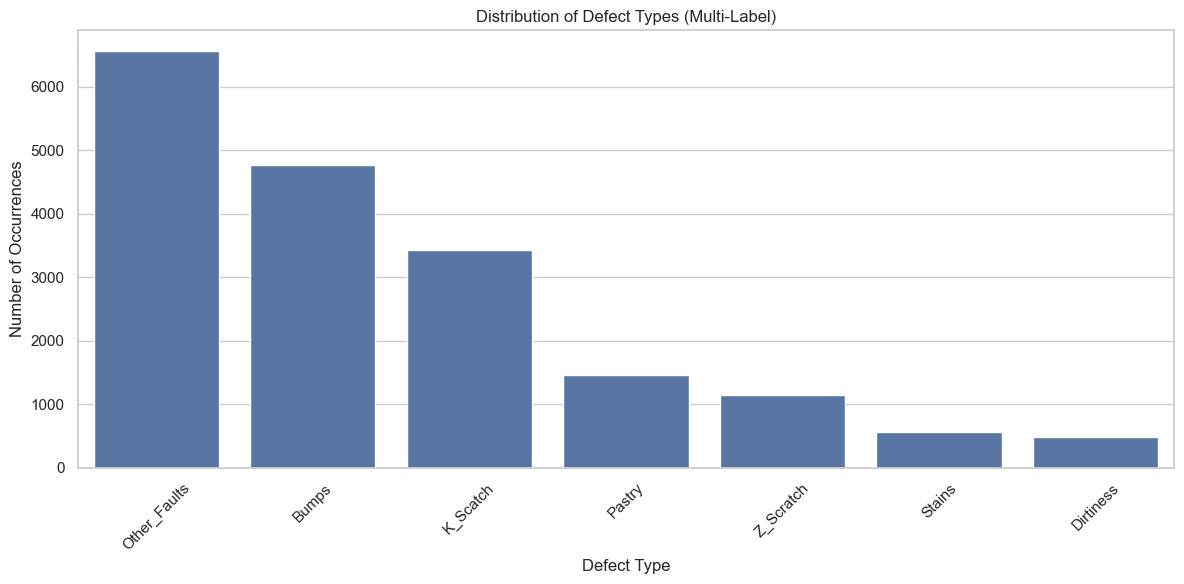

In [36]:
if not df_train_initial.empty:
    print("\n--- 3.d Target Variable Distribution (Defect Types) ---")
    target_counts = df_train_initial[target_columns].sum().sort_values(ascending=False)
    print("Counts for each defect type:")
    print(target_counts)

    no_defect_count = df_train_initial[df_train_initial[target_columns].sum(axis=1) == 0].shape[0]
    print(f"\nNumber of samples with no defects: {no_defect_count}")
    print(f"Total number of samples: {df_train_initial.shape[0]}")
    print(f"Number of samples with at least one defect: {df_train_initial.shape[0] - no_defect_count}")

    plt.figure(figsize=(12, 6))
    sns.barplot(x=target_counts.index, y=target_counts.values)
    plt.title('Distribution of Defect Types (Multi-Label)')
    plt.xlabel('Defect Type')
    plt.ylabel('Number of Occurrences')
    plt.xticks(rotation=45)
    plt.tight_layout()
    if eda_folder:
        try:
            plot_filename_dist = os.path.join(eda_folder, 'defect_type_distribution.png')
            plt.savefig(plot_filename_dist, bbox_inches='tight')
            print(f"Saved target distribution plot to: {plot_filename_dist}")
        except Exception as e:
            print(f"Could not save target distribution plot: {e}")
    plt.show()

The distribution shows an imbalance among defect types, with 'Other_Faults' being the most common and 'Dirtiness'/'Stains' being the least common.

### 3.e Feature Visualizations

#### Histograms of Numerical Features


--- Generating histograms for numerical features ---
Saved feature histograms plot to: eda\feature_histograms.png


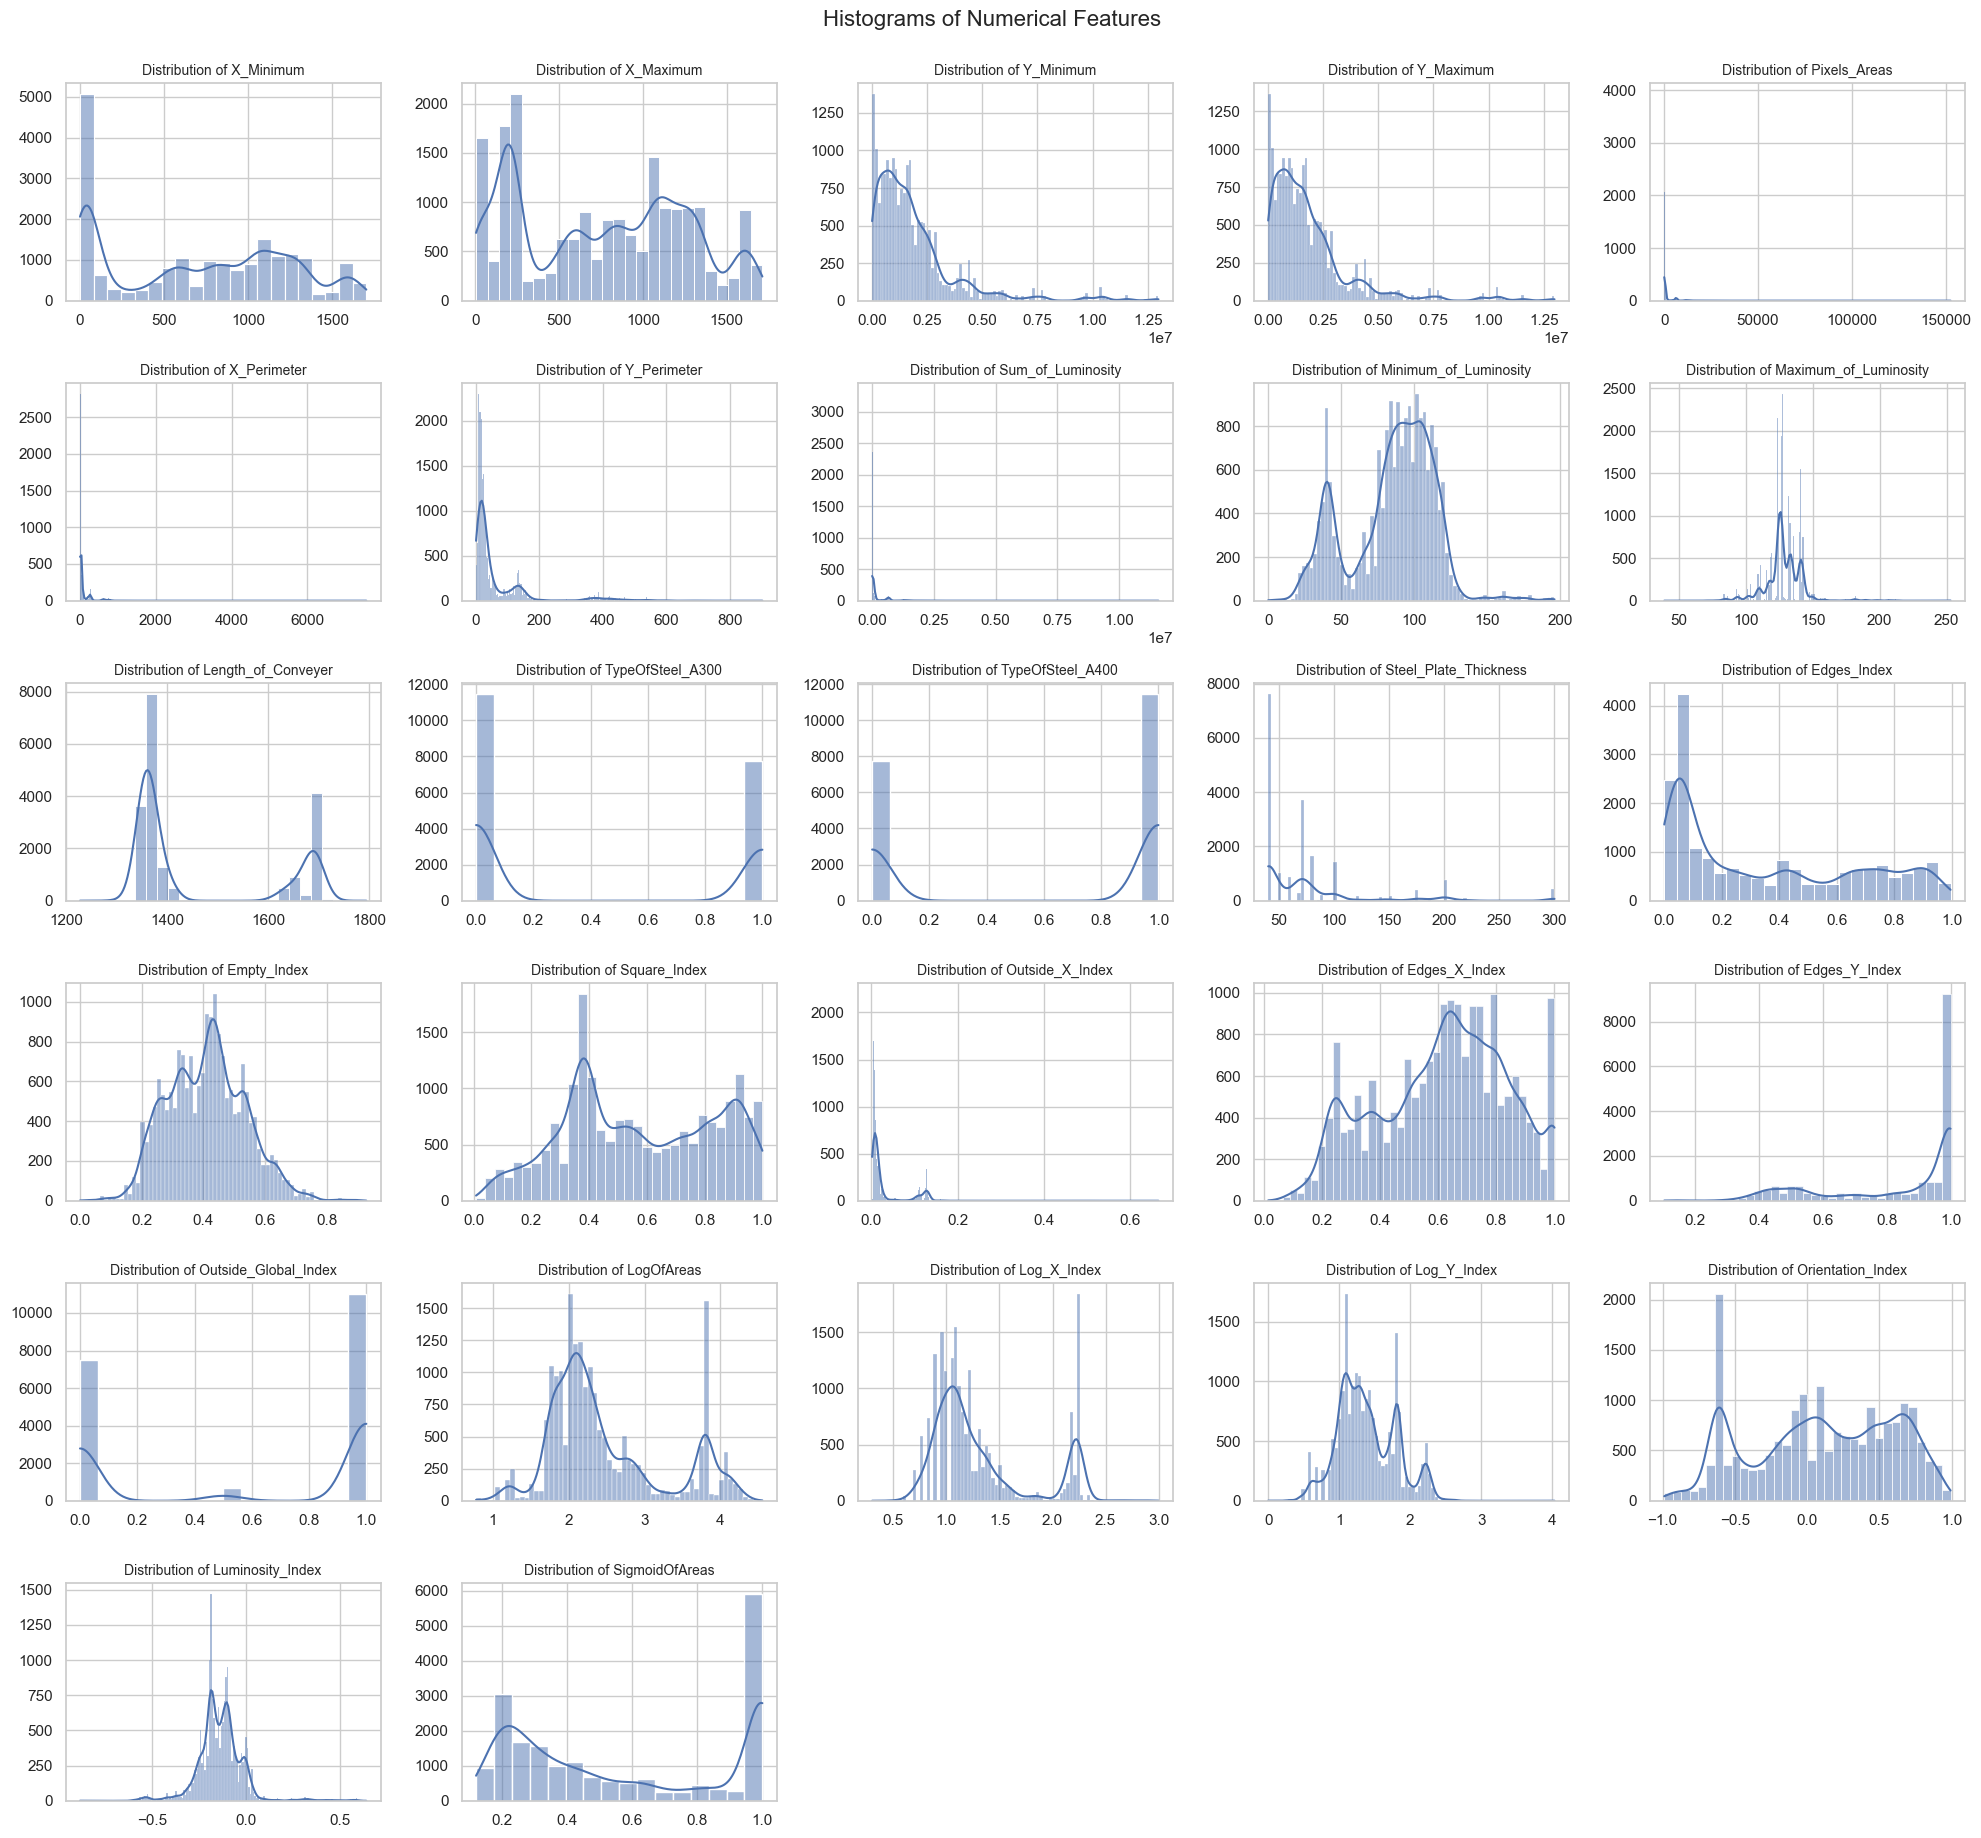

In [37]:
if not df_train_initial.empty:
    print("\n--- Generating histograms for numerical features ---")
    num_features_to_plot = len(feature_columns)
    n_cols = 5 
    n_rows = (num_features_to_plot + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))
    axes = axes.flatten()

    for i, col in enumerate(feature_columns[:num_features_to_plot]):
        if pd.api.types.is_numeric_dtype(df_train_initial[col]):
            sns.histplot(df_train_initial[col], kde=True, ax=axes[i])
            axes[i].set_title(f'Distribution of {col}', fontsize=10)
            axes[i].set_xlabel('')
            axes[i].set_ylabel('')
        else:
            axes[i].set_title(f'{col} (Non-Numeric)', fontsize=10)
            axes[i].set_xticks([])
            axes[i].set_yticks([])

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.suptitle('Histograms of Numerical Features', y=1.02, fontsize=16)
    if eda_folder:
        try:
            plot_filename_hist = os.path.join(eda_folder, 'feature_histograms.png') # Save as png for better quality
            plt.savefig(plot_filename_hist, bbox_inches='tight')
            print(f"Saved feature histograms plot to: {plot_filename_hist}")
        except Exception as e:
            print(f"Could not save feature histograms plot: {e}")
    plt.show()

**Figure: Histograms of Numerical Features**

These histograms display the distribution of each numerical feature in the dataset.
- **Skewness:** Many features, such as `Pixels_Areas`, `X_Perimeter`, `Y_Perimeter`, `Sum_of_Luminosity`, and `Outside_X_Index`, are heavily right-skewed, with most values concentrated on the left side and a long tail to the right. This aligns with the observations from the statistical summary table.
- **Log-Transformed Features:** Features like `LogOfAreas`, `Log_X_Index`, and `Log_Y_Index` (which are log-transformed versions of area/dimensions) appear more bell-shaped than their original counterparts, though some skewness might still be present. This demonstrates the utility of log transformation for highly skewed data.
- **Bi-modal/Multi-modal Distributions:** Some features like `Length_of_Conveyer` or `Steel_Plate_Thickness` might hint at bi-modal or multi-modal distributions, possibly indicating distinct groups or operational conditions.
- **Index Features:** Many index features (e.g., `Edges_Index`, `Empty_Index`, `Square_Index`, `SigmoidOfAreas`) are distributed between 0 and 1, as expected by their definition. `Orientation_Index` is centered around 0 but spans negative and positive values.

#### Correlation Heatmaps


--- Generating correlation heatmaps ---
Saved feature-target correlation heatmap to: eda\feature_target_correlation_heatmap.png


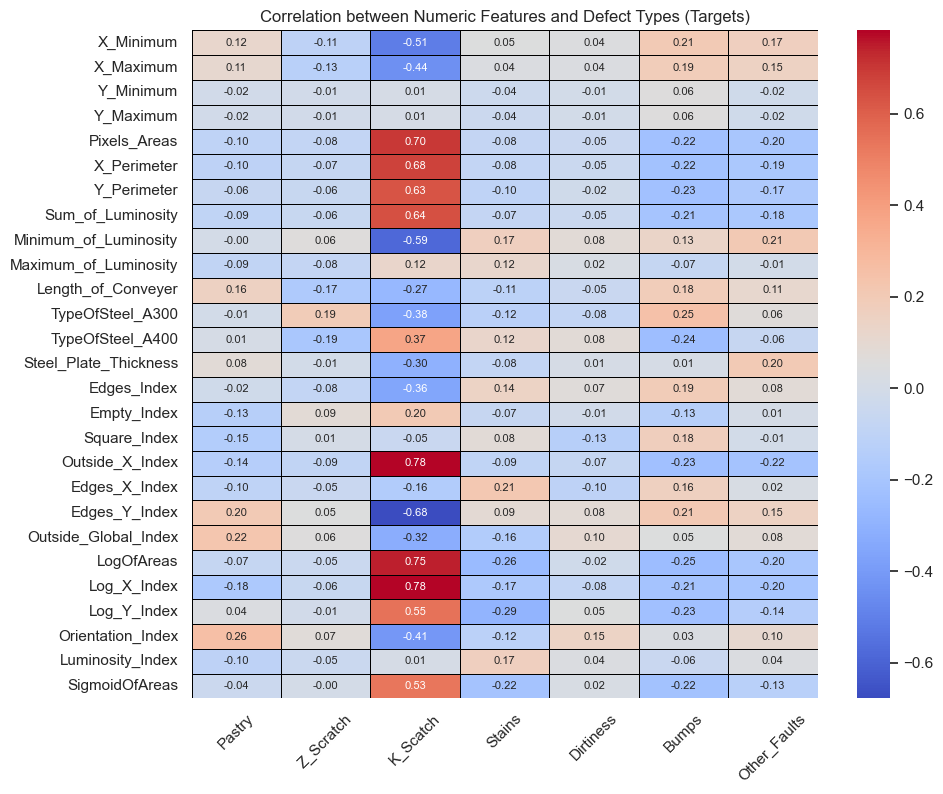

Saved feature-feature correlation heatmap to: eda\feature_feature_correlation_heatmap.png


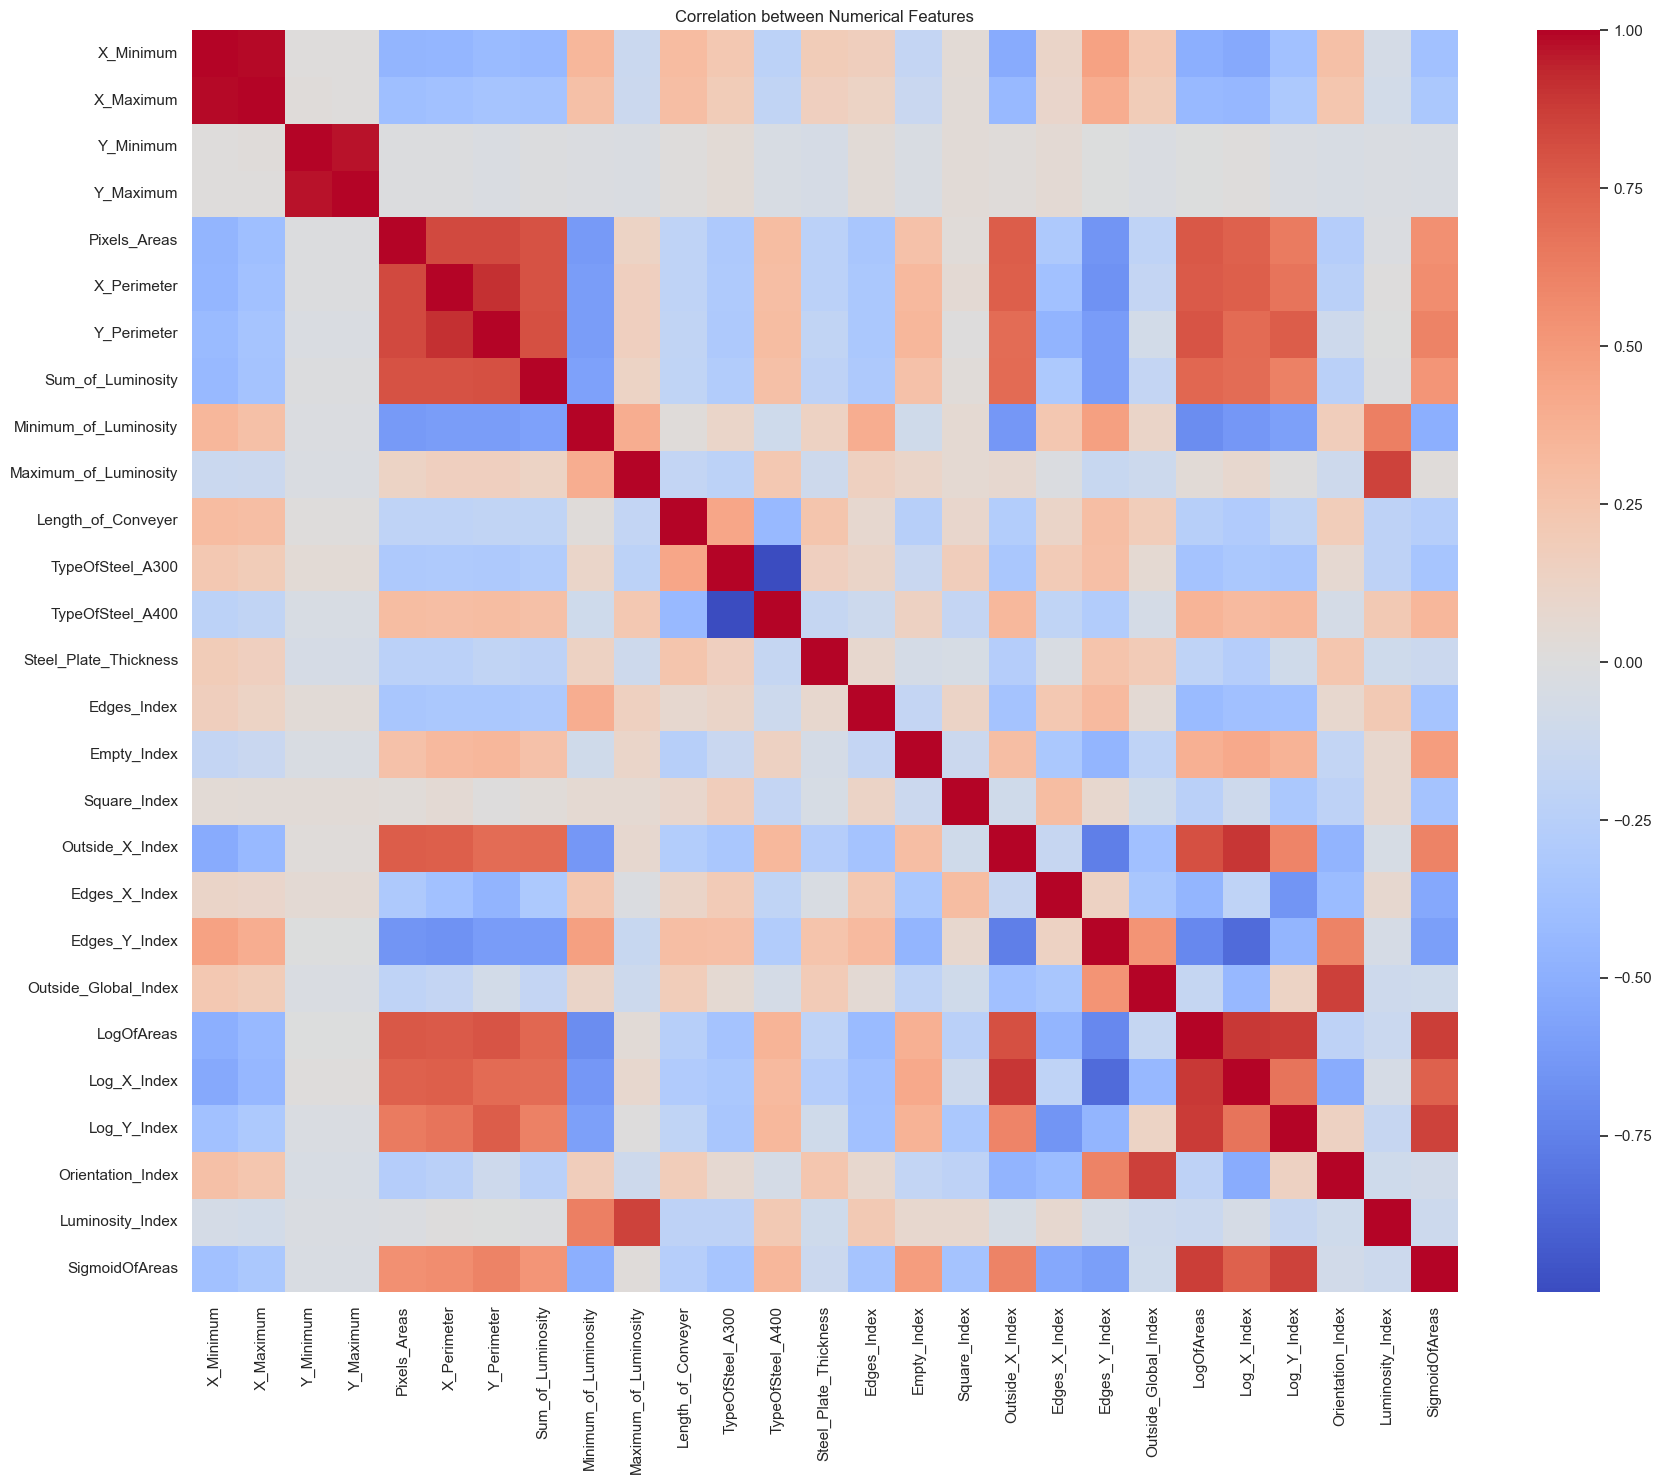

In [38]:
if not df_train_initial.empty:
    print("\n--- Generating correlation heatmaps ---")
    numeric_feature_columns_corr = df_train_initial[feature_columns].select_dtypes(include=np.number).columns.tolist()
    if len(numeric_feature_columns_corr) < len(feature_columns):
        print(f"Warning: Excluded {len(feature_columns)-len(numeric_feature_columns_corr)} non-numeric columns from correlation analysis.")
    
    if numeric_feature_columns_corr and target_columns:
        correlation_matrix = df_train_initial[numeric_feature_columns_corr + target_columns].corr()
        
        # Feature-Target Correlation
        if not correlation_matrix.empty:
            feature_target_corr = correlation_matrix[target_columns].loc[numeric_feature_columns_corr]
            plt.figure(figsize=(10, max(8, len(numeric_feature_columns_corr) * 0.3)))
            sns.heatmap(feature_target_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, linecolor='black', annot_kws={"size": 8})
            plt.title('Correlation between Numeric Features and Defect Types (Targets)')
            plt.xticks(rotation=45)
            plt.yticks(rotation=0)
            plt.tight_layout()
            if eda_folder:
                try:
                    plot_filename_corr_target = os.path.join(eda_folder, 'feature_target_correlation_heatmap.png')
                    plt.savefig(plot_filename_corr_target, bbox_inches='tight')
                    print(f"Saved feature-target correlation heatmap to: {plot_filename_corr_target}")
                except Exception as e:
                    print(f"Could not save feature-target correlation heatmap: {e}")
            plt.show()
        else:
            print("Correlation matrix is empty. Skipping feature-target heatmap.")

        # Feature-Feature Correlation
        if not correlation_matrix.empty and len(numeric_feature_columns_corr) > 1:
            feature_feature_corr = correlation_matrix.loc[numeric_feature_columns_corr, numeric_feature_columns_corr]
            plt.figure(figsize=(18, 15))
            sns.heatmap(feature_feature_corr, annot=False, cmap='coolwarm', fmt=".1f")
            plt.title('Correlation between Numerical Features')
            plt.tight_layout()
            if eda_folder:
                try:
                    plot_filename_corr_features = os.path.join(eda_folder, 'feature_feature_correlation_heatmap.png')
                    plt.savefig(plot_filename_corr_features, bbox_inches='tight')
                    print(f"Saved feature-feature correlation heatmap to: {plot_filename_corr_features}")
                except Exception as e:
                    print(f"Could not save feature-feature correlation heatmap: {e}")
            plt.show()
        elif len(numeric_feature_columns_corr) <=1:
            print("Not enough numeric features (<=1) to generate feature-feature correlation heatmap.")
    else:
        print("Skipping correlation heatmaps (no numeric features or no target columns defined).")

**Figure: Correlation Heatmap between Numeric Features and Target Defect Types**

This heatmap visualizes the Pearson correlation coefficients between each numerical feature and each of the 7 target defect types.
- **Red cells** indicate positive correlation (as the feature value increases, the likelihood of the defect increases).
- **Blue cells** indicate negative correlation (as the feature value increases, the likelihood of the defect decreases).
- **Lighter/Whiter cells** indicate weak or no linear correlation.

**Key Observations:**
- **`K_Scatch`:** Shows notable positive correlations with `Pixels_Areas` (0.70), `X_Perimeter` (0.68), `Y_Perimeter` (0.63), `Sum_of_Luminosity` (0.64), `LogOfAreas` (0.75), and `Log_X_Index` (0.78). This suggests larger, wider defects are more likely to be `K_Scatch`. It also has a strong negative correlation with `Outside_X_Index` (-0.78) and `Edges_X_Index` (-0.68), implying these scratches are typically well-contained within the plate's main surface rather than extending to the edges. `Orientation_Index` shows a negative correlation (-0.41), suggesting a particular orientation preference.
- **`Z_Scratch`:** Exhibits a moderate positive correlation with `TypeOfSteel_A300` (0.38) and a negative correlation with `TypeOfSteel_A400` (-0.37), suggesting this defect type is more common with steel type A300.
- **`Bumps`:** Shows some positive correlation with `Outside_X_Index` (0.22) and `Log_X_Index` (0.25), and `Edges_Y_Index` (0.21).
- **`Other_Faults`:** Correlates positively with `Steel_Plate_Thickness` (0.20) and `Sum_of_Luminosity` (0.21).
- **Weak Correlations:** Many features show weak correlations with defect types like `Pastry`, `Stains`, and `Dirtiness`, suggesting that linear relationships alone might not be strong predictors for these, or a combination of features is needed.

These correlations provide initial hints about which features might be more influential for predicting specific defects. However, low correlation does not necessarily mean a feature is useless, as non-linear relationships might exist.

**Figure: Correlation Heatmap between Numerical Features**

This heatmap displays the Pearson correlation coefficients between pairs of numerical features.
- **Strong Positive Correlations (Dark Red):**
    - `X_Minimum` and `X_Maximum` are highly correlated, as expected (they define the x-bounds of a defect). Similarly for `Y_Minimum` and `Y_Maximum`.
    - `Pixels_Areas` is strongly correlated with `X_Perimeter`, `Y_Perimeter`, `Sum_of_Luminosity`, and `LogOfAreas`. This makes sense as larger areas tend to have larger perimeters and luminosity sums.
    - `LogOfAreas` is highly correlated with `Log_X_Index` and `Log_Y_Index`.
- **Strong Negative Correlations (Dark Blue):**
    - `TypeOfSteel_A300` and `TypeOfSteel_A400` are perfectly negatively correlated (-1.00), indicating they are mutually exclusive binary flags (if one is 1, the other is 0).
    - `Edges_X_Index` shows a strong negative correlation with `Outside_X_Index`.
- **Multicollinearity:** The presence of several strongly correlated feature pairs (e.g., values > 0.7 or < -0.7) indicates multicollinearity. This means some features provide redundant information. While not problematic for all models, it can affect the interpretability of coefficients in linear models and might be a consideration for feature selection or dimensionality reduction techniques.
For example, `Pixels_Areas` and `LogOfAreas` are highly correlated, as `LogOfAreas` is a direct transformation of `Pixels_Areas`. Using both might be redundant for some models.

> Note: High positive (red) or negative (blue) correlations between features might indicate multicollinearity (redundancy). Features highly correlated with target variables are potentially good predictors. Low correlation doesn't necessarily mean a feature is useless (non-linear relationships might exist).

### 3.f Initial Preprocessing Considerations (Based on EDA)

In [39]:
if not df_train_initial.empty:
    print("\n--- 3.f Initial Preprocessing Considerations (Based on EDA) ---")
    # Re-fetch stats for numeric_feature_columns as defined earlier for consistency
    if numeric_features_for_summary: # Check if list from 3.c is not empty
        stats = df_train_initial[numeric_features_for_summary].describe().T 
    else:
        stats = pd.DataFrame() # Empty dataframe if no numeric features
        
    if not stats.empty:
        if 'std' in stats.columns and 'min' in stats.columns and 'max' in stats.columns:
            min_std_val = stats['std'].replace(0, 1e-6).min()
            max_abs_val = stats[['min', 'max']].abs().max(axis=1)
            meaningful_std = stats['std'].replace(0, 1e-6)
            range_to_std_ratio = (max_abs_val / meaningful_std).max()

            print(f"Debug: min_std_val = {min_std_val}, range_to_std_ratio = {range_to_std_ratio}")

            if range_to_std_ratio > 50:
                 print("- Feature scales vary significantly (based on range to std dev ratio).")
                 print("  Consider Normalization (e.g., MinMaxScaler) or Standardization (e.g., StandardScaler).")
            else:
                 print("- Feature scales seem relatively comparable or scaling might not be strictly required, but still often beneficial.")
        else:
            print("- Could not fully assess feature scales due to missing stats columns (std, min, max).")
    else:
        print("- No numeric features found to assess scales for normalization.")

    if df_train_initial.isnull().sum().sum() > 0:
        print("- Missing values detected. Need an imputation strategy.")
    else:
        print("- No missing values detected. No imputation needed based on this check.")

    non_numeric_actual_features = df_train_initial[feature_columns].select_dtypes(exclude=np.number).columns.tolist()
    if non_numeric_actual_features:
        print(f"- Non-numeric feature columns found: {', '.join(non_numeric_actual_features)}. These may require encoding.")
    else:
        print("- Data types for features seem appropriate (mostly numerical). No obvious categorical encoding needed.")

    print("- Target variables are multi-label binary indicators.")
    if not target_counts.empty:
        min_target_val_count = target_counts.min()
        max_target_val_count = target_counts.max()
        if max_target_val_count / (min_target_val_count + 1e-6) > 5:
            print("- Class imbalance observed in target variables. May need special handling during modeling.")
        else:
            print("- Target variable distribution seems relatively balanced, but monitor metrics closely.")
    else:
        print("- Could not assess target balance (no target counts).")
else:
    print("DataFrame is empty. Skipping preprocessing considerations.")


--- 3.f Initial Preprocessing Considerations (Based on EDA) ---
Debug: min_std_val = 0.047301941353806255, range_to_std_ratio = 42.47520700932078
- Feature scales seem relatively comparable or scaling might not be strictly required, but still often beneficial.
- No missing values detected. No imputation needed based on this check.
- Data types for features seem appropriate (mostly numerical). No obvious categorical encoding needed.
- Target variables are multi-label binary indicators.
- Class imbalance observed in target variables. May need special handling during modeling.


## 4. Data Splitting

The data is split into training and validation sets to evaluate model performance on unseen data.

In [40]:
from sklearn.model_selection import train_test_split

if not df_train_initial.empty:
    print("\n--- Splitting Data into Training and Validation Sets ---")

    # Separate features and targets
    X = df_train_initial[feature_columns] # features
    y = df_train_initial[target_columns] # targets

    # Stratify based on whether a sample has any defect or not, to maintain proportion of defected samples.
    # This is a simple stratification for multi-label; more complex strategies might be needed.
    stratify_col = (y.sum(axis=1) > 0)
    
    # Split into training (80%) and validation (20%) sets
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=stratify_col 
    )

    print("Training features shape:", X_train.shape)
    print("Validation features shape:", X_val.shape)
    print("Training targets shape:", y_train.shape)
    print("Validation targets shape:", y_val.shape)

    print("\n--- Data Splitting Complete. ---")
else:
    print("DataFrame is empty. Skipping data splitting.")
    # Define empty DFs to prevent errors in next step if needed, though logic should handle it
    X_train, X_val, y_train, y_val = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()


--- Splitting Data into Training and Validation Sets ---
Training features shape: (15375, 27)
Validation features shape: (3844, 27)
Training targets shape: (15375, 7)
Validation targets shape: (3844, 7)

--- Data Splitting Complete. ---


| Dataset            | Features Shape | Target Shape |
|-------------------|----------------|--------------|
| Training          | (15375, 27)    | (15375, 7)   |
| Validation        | (3844, 27)     | (3844, 7)    |

## 5. Data Preprocessing

This section covers preprocessing steps applied to the data, such as feature scaling. Given that many of your features are skewed and have potential outliers, StandardScaler will be used.

### 5.a Feature Scaling (Standardization)

In [41]:
from sklearn.preprocessing import StandardScaler

if not X_train.empty and not X_val.empty:
    print("\n--- 3. Data Preprocessing (Feature Scaling) ---")

    # Identify numeric feature columns from X_train (should be consistent with feature_columns from EDA)
    numeric_cols_to_scale = X_train.select_dtypes(include=np.number).columns.tolist()

    if not numeric_cols_to_scale:
        print("No numeric features identified in X_train for scaling.")
    else:
        print(f"\nApplying StandardScaler to {len(numeric_cols_to_scale)} numeric features: {', '.join(numeric_cols_to_scale)}")

        scaler = StandardScaler()

        # Fit the scaler on the training data's numeric features ONLY
        scaler.fit(X_train[numeric_cols_to_scale])

        # Save the scaler
        if eda_folder:
            scaler_filename = os.path.join(eda_folder, 'standard_scaler.joblib')
            try:
                joblib.dump(scaler, scaler_filename)
                print(f"\nSaved StandardScaler to: {scaler_filename}")
            except Exception as e:
                print(f"\nCould not save StandardScaler: {e}")

        # Transform both training and validation data's numeric features
        # Make copies to keep original X_train/X_val numeric values
        X_train_scaled = X_train.copy()
        X_val_scaled = X_val.copy()

        X_train_scaled[numeric_cols_to_scale] = scaler.transform(X_train[numeric_cols_to_scale])
        X_val_scaled[numeric_cols_to_scale] = scaler.transform(X_val[numeric_cols_to_scale])

        print("\nFirst 5 rows of X_train_scaled after scaling numeric features:")
        display(X_train_scaled.head())

        print("\nStatistical summary of scaled numeric features in X_train_scaled (mean ~0, std ~1):")
        display(X_train_scaled[numeric_cols_to_scale].describe().T)
        
        print("\n--- End of Data Preprocessing Step ---")
else:
    print("X_train or X_val is empty. Skipping scaling.")
    X_train_scaled = X_train # Assign to avoid undefined errors if used later
    X_val_scaled = X_val   # Assign to avoid undefined errors if used later


--- 3. Data Preprocessing (Feature Scaling) ---

Applying StandardScaler to 27 numeric features: X_Minimum, X_Maximum, Y_Minimum, Y_Maximum, Pixels_Areas, X_Perimeter, Y_Perimeter, Sum_of_Luminosity, Minimum_of_Luminosity, Maximum_of_Luminosity, Length_of_Conveyer, TypeOfSteel_A300, TypeOfSteel_A400, Steel_Plate_Thickness, Edges_Index, Empty_Index, Square_Index, Outside_X_Index, Edges_X_Index, Edges_Y_Index, Outside_Global_Index, LogOfAreas, Log_X_Index, Log_Y_Index, Orientation_Index, Luminosity_Index, SigmoidOfAreas

Saved StandardScaler to: eda\standard_scaler.joblib

First 5 rows of X_train_scaled after scaling numeric features:


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
3231,0.604724,0.585195,1.695658,1.700616,-0.415590,-0.436425,-0.465207,-0.391666,-0.413528,-0.259641,...,-0.448928,0.870661,0.757981,0.847858,-0.409352,-0.228380,-0.388457,0.349609,-0.732168,-0.528365
13310,0.931238,0.918241,0.594889,0.597096,-0.350859,-0.358573,-0.069146,-0.334438,0.663327,-0.118939,...,-0.463960,-1.142842,0.757981,0.847858,0.149007,-0.495654,0.906809,1.053029,0.330760,0.898478
8677,-1.258659,-1.076048,0.075896,0.076750,1.440757,0.703563,0.544749,1.179412,-1.455645,-0.329991,...,2.115054,0.775336,-1.393945,-1.225170,1.807525,1.994764,1.200672,-1.407403,-0.439489,1.295643
460,-1.314954,-1.464934,-0.407933,-0.408239,-0.239543,-0.464230,-0.178063,-0.288500,0.003319,-0.118939,...,-0.500466,1.352678,0.757981,0.847858,0.565148,-0.495654,0.677290,1.671472,-0.240501,1.294136
10382,-1.224882,-1.379180,-0.853584,-0.855004,-0.426695,-0.430865,-0.445404,-0.395310,0.524378,0.865969,...,-0.539119,-0.388790,0.757981,0.847858,-0.600730,-0.763142,-0.327318,1.272245,0.623438,-0.660351



Statistical summary of scaled numeric features in X_train_scaled (mean ~0, std ~1):


,count,mean,std,min,25%,50%,75%,max
X_Minimum,15375.0,-1.432639e-17,1.000033,-1.331843,-1.239894,0.124335,0.829906,1.867621
X_Maximum,15375.0,2.819064e-17,1.000033,-1.494849,-1.076048,0.082634,0.822515,1.913391
Y_Minimum,15375.0,6.932124e-18,1.000033,-0.968344,-0.628431,-0.236277,0.270696,5.859022
Y_Maximum,15375.0,3.119456e-17,1.000033,-0.970057,-0.627642,-0.236386,0.269372,5.874402
Pixels_Areas,15375.0,3.234991e-18,1.000033,-0.452966,-0.430486,-0.409090,-0.278003,40.890716
X_Perimeter,15375.0,9.011762e-18,1.000033,-0.519839,-0.447547,-0.391938,-0.180623,41.470680
Y_Perimeter,15375.0,-1.629049e-17,1.000033,-0.613730,-0.504813,-0.405798,-0.029540,8.307552
Sum_of_Luminosity,15375.0,-2.403136e-17,1.000033,-0.424307,-0.403063,-0.384748,-0.274572,25.230894
Minimum_of_Luminosity,15375.0,2.447040e-16,1.000033,-2.949347,-0.517740,0.177005,0.698064,3.859153
Maximum_of_Luminosity,15375.0,5.961627e-16,1.000033,-6.309796,-0.329991,-0.118939,0.443866,8.745241



--- End of Data Preprocessing Step ---


**Applied StandardScaler to 27 numeric features:**
```
X_Minimum, X_Maximum, Y_Minimum, Y_Maximum, Pixels_Areas, X_Perimeter, Y_Perimeter, 
Sum_of_Luminosity, Minimum_of_Luminosity, Maximum_of_Luminosity, Length_of_Conveyer, 
TypeOfSteel_A300, TypeOfSteel_A400, Steel_Plate_Thickness, Edges_Index, Empty_Index, 
Square_Index, Outside_X_Index, Edges_X_Index, Edges_Y_Index, Outside_Global_Index, 
LogOfAreas, Log_X_Index, Log_Y_Index, Orientation_Index, Luminosity_Index, SigmoidOfAreas
```
The scaled features now have a mean close to 0 and a standard deviation close to 1, which is the expected outcome of Standardization.

## 6. Model Selection, Training, and Testing

In this section, we will select, train, and test at least three supervised learning algorithms. Given that this is a multi-label classification problem (each steel plate can exhibit multiple defect types simultaneously), we need to use models that either natively support multi-label classification or can be adapted using strategies like Binary Relevance.

**Strategy for Multi-Label Classification:**
For classifiers that don't natively support multi-label outputs (like some configurations of SVM), we will use the **Binary Relevance** approach. This involves training one independent binary classifier for each of the 7 defect types. Scikit-learn's `OneVsRestClassifier` is a common wrapper for this. For models like K-Nearest Neighbors, Decision Trees, and MLPClassifiers, they can often handle multi-label targets directly if `y_train` is provided as a binary matrix.

**Evaluation Metrics:**
We will assess performance using:
- **Subset Accuracy:** The percentage of samples where all labels are predicted correctly.
- **Hamming Loss:** The fraction of labels that are incorrectly predicted.
- **Precision, Recall, F1-Score (per-sample averages):** These provide a more nuanced view of performance for multi-label tasks. We'll use `average='samples'` for these, which calculates metrics for each sample and finds their average.
- **Confusion Matrices:** Generated per label to understand individual class performance.
- **Training and Testing Times:** To compare computational efficiency.
- **ROC AUC Score (per-label and averaged):** To evaluate the model's ability to distinguish between classes.

We will use `GridSearchCV` for basic hyperparameter tuning for each model.

In [42]:
# Import necessary libraries for modeling and evaluation
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC # For SVM, can be slow; LinearSVC might be an alternative for speed
from sklearn.multiclass import OneVsRestClassifier # For Binary Relevance

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import (
    accuracy_score, # Subset accuracy for multi-label
    precision_score,
    recall_score,
    f1_score,
    multilabel_confusion_matrix,
    roc_auc_score,
    roc_curve,
    hamming_loss # Good for multi-label
)

# For plotting ROC curves if needed later
# from sklearn.preprocessing import label_binarize # Not strictly needed if y is already binary matrix

# Store results
model_performance = {}

# For clarity, let's assign the preprocessed data to standard X_train, y_train etc.
# This assumes X_train_scaled and X_val_scaled from your notebook's cell 11 output are the correct ones.
X_train_processed = X_train_scaled.copy()
y_train_processed = y_train.copy() # y_train was defined in cell 10
X_val_processed = X_val_scaled.copy()
y_val_processed = y_val.copy()   # y_val was defined in cell 10

print("Modeling libraries imported.")
print("Using processed data shapes:")
print("X_train_processed shape:", X_train_processed.shape)
print("y_train_processed shape:", y_train_processed.shape)
print("X_val_processed shape:", X_val_processed.shape)
print("y_val_processed shape:", y_val_processed.shape)

Modeling libraries imported.
Using processed data shapes:
X_train_processed shape: (15375, 27)
y_train_processed shape: (15375, 7)
X_val_processed shape: (3844, 27)
y_val_processed shape: (3844, 7)


### 6.1 Model 1: Decision Tree Classifier

Decision Trees are non-parametric supervised learning methods used for classification and regression. They are generally easy to understand and interpret. For multi-label classification, `DecisionTreeClassifier` can handle this directly.

In [43]:
print("--- Training Decision Tree Classifier ---")

# Define the parameter grid for Decision Tree
dt_param_grid = {
    'estimator__criterion': ['gini', 'entropy'],
    'estimator__max_depth': [None, 10, 20, 30],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4]
}
# DecisionTreeClassifier can handle multi-label directly.
# However, to ensure consistent structure and for comparison,
# we can still wrap it with OneVsRestClassifier for hyperparameter tuning purposes,
# or use it directly if its multi-label performance is good.
# For this exercise, we'll use OneVsRestClassifier to train one tree per label.
# This also makes probability estimation for ROC AUC more straightforward for some base estimators.

# If DecisionTreeClassifier is used directly:
# dt_base = DecisionTreeClassifier(random_state=42)
# dt_param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }
# dt_grid_search = GridSearchCV(dt_base, dt_param_grid, cv=3, scoring='f1_samples', n_jobs=-1, verbose=1)


dt_one_vs_rest = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
dt_grid_search = GridSearchCV(dt_one_vs_rest, dt_param_grid, cv=3, scoring='f1_samples', n_jobs=-1, verbose=1)

print("Starting GridSearchCV for Decision Tree...")
start_train_time_dt = time.time()
dt_grid_search.fit(X_train_processed, y_train_processed)
train_time_dt = time.time() - start_train_time_dt
print(f"Training completed in {train_time_dt:.2f} seconds.")

best_dt = dt_grid_search.best_estimator_
print("Best Decision Tree Parameters:", dt_grid_search.best_params_)

start_test_time_dt = time.time()
y_pred_dt = best_dt.predict(X_val_processed)
test_time_dt = time.time() - start_test_time_dt
print(f"Prediction on validation set completed in {test_time_dt:.2f} seconds.")

# Evaluation Metrics
accuracy_dt = accuracy_score(y_val_processed, y_pred_dt)
precision_dt = precision_score(y_val_processed, y_pred_dt, average='samples', zero_division=0)
recall_dt = recall_score(y_val_processed, y_pred_dt, average='samples', zero_division=0)
f1_dt = f1_score(y_val_processed, y_pred_dt, average='samples', zero_division=0)
hamming_dt = hamming_loss(y_val_processed, y_pred_dt)

# Store performance
model_performance['Decision Tree (OvR)'] = {
    'Subset Accuracy': accuracy_dt,
    'Precision (Samples)': precision_dt,
    'Recall (Samples)': recall_dt,
    'F1-Score (Samples)': f1_dt,
    'Hamming Loss': hamming_dt,
    'Train Time (s)': train_time_dt,
    'Test Time (s)': test_time_dt,
    'Best Params': dt_grid_search.best_params_,
    'Predictions': y_pred_dt, # Store predictions for later use (e.g. confusion matrix)
    'Probabilities': best_dt.predict_proba(X_val_processed) if hasattr(best_dt, "predict_proba") else None # For ROC
}

print("\nDecision Tree (One-vs-Rest) Performance:")
print(f"  Subset Accuracy: {accuracy_dt:.4f}")
print(f"  Precision (Samples): {precision_dt:.4f}")
print(f"  Recall (Samples): {recall_dt:.4f}")
print(f"  F1-Score (Samples): {f1_dt:.4f}")
print(f"  Hamming Loss: {hamming_dt:.4f}")
print(f"  Training Time: {train_time_dt:.2f}s")
print(f"  Testing Time: {test_time_dt:.2f}s")

--- Training Decision Tree Classifier ---
Starting GridSearchCV for Decision Tree...
Fitting 3 folds for each of 72 candidates, totalling 216 fits
Training completed in 41.84 seconds.
Best Decision Tree Parameters: {'estimator__criterion': 'entropy', 'estimator__max_depth': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2}
Prediction on validation set completed in 0.01 seconds.

Decision Tree (One-vs-Rest) Performance:
  Subset Accuracy: 0.3351
  Precision (Samples): 0.4016
  Recall (Samples): 0.4832
  F1-Score (Samples): 0.4276
  Hamming Loss: 0.1420
  Training Time: 41.84s
  Testing Time: 0.01s


### 6.2 Model 2: K-Nearest Neighbors (k-NN) Classifier

K-Nearest Neighbors is a non-parametric method used for classification and regression. For multi-label classification, `KNeighborsClassifier` can directly predict multiple labels based on the labels of its nearest neighbors.

In [44]:
print("--- Training K-Nearest Neighbors Classifier ---")

# Define the parameter grid for k-NN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# KNeighborsClassifier supports multi-label output directly
knn_classifier = KNeighborsClassifier(n_jobs=-1)
knn_grid_search = GridSearchCV(knn_classifier, knn_param_grid, cv=3, scoring='f1_samples', n_jobs=-1, verbose=1)

print("Starting GridSearchCV for K-Nearest Neighbors...")
start_train_time_knn = time.time()
knn_grid_search.fit(X_train_processed, y_train_processed)
train_time_knn = time.time() - start_train_time_knn
print(f"Training completed in {train_time_knn:.2f} seconds.")

best_knn = knn_grid_search.best_estimator_
print("Best k-NN Parameters:", knn_grid_search.best_params_)

start_test_time_knn = time.time()
y_pred_knn = best_knn.predict(X_val_processed)
test_time_knn = time.time() - start_test_time_knn
print(f"Prediction on validation set completed in {test_time_knn:.2f} seconds.")

# Evaluation Metrics
accuracy_knn = accuracy_score(y_val_processed, y_pred_knn)
precision_knn = precision_score(y_val_processed, y_pred_knn, average='samples', zero_division=0)
recall_knn = recall_score(y_val_processed, y_pred_knn, average='samples', zero_division=0)
f1_knn = f1_score(y_val_processed, y_pred_knn, average='samples', zero_division=0)
hamming_knn = hamming_loss(y_val_processed, y_pred_knn)

# Store performance
model_performance['k-NN'] = {
    'Subset Accuracy': accuracy_knn,
    'Precision (Samples)': precision_knn,
    'Recall (Samples)': recall_knn,
    'F1-Score (Samples)': f1_knn,
    'Hamming Loss': hamming_knn,
    'Train Time (s)': train_time_knn,
    'Test Time (s)': test_time_knn,
    'Best Params': knn_grid_search.best_params_,
    'Predictions': y_pred_knn,
    'Probabilities': best_knn.predict_proba(X_val_processed) if hasattr(best_knn, "predict_proba") else None
}

print("\nK-Nearest Neighbors Performance:")
print(f"  Subset Accuracy: {accuracy_knn:.4f}")
print(f"  Precision (Samples): {precision_knn:.4f}")
print(f"  Recall (Samples): {recall_knn:.4f}")
print(f"  F1-Score (Samples): {f1_knn:.4f}")
print(f"  Hamming Loss: {hamming_knn:.4f}")
print(f"  Training Time: {train_time_knn:.2f}s")
print(f"  Testing Time: {test_time_knn:.2f}s")

--- Training K-Nearest Neighbors Classifier ---
Starting GridSearchCV for K-Nearest Neighbors...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Training completed in 14.15 seconds.
Best k-NN Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Prediction on validation set completed in 1.22 seconds.

K-Nearest Neighbors Performance:
  Subset Accuracy: 0.4373
  Precision (Samples): 0.4274
  Recall (Samples): 0.4270
  F1-Score (Samples): 0.4272
  Hamming Loss: 0.1284
  Training Time: 14.15s
  Testing Time: 1.22s


### 6.3 Model 3: Multi-Layer Perceptron (MLP) Classifier (Neural Network)

A Multi-Layer Perceptron is a class of feedforward artificial neural network. `MLPClassifier` can handle multi-label classification directly. Neural networks can be powerful but might require more data and careful tuning.

In [45]:
print("--- Training MLP Classifier (Neural Network) ---")

# Define the parameter grid for MLP - small for assignment purposes
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50,25)], # Smaller networks
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001], # L2 penalty
    'learning_rate_init': [0.001, 0.01]
}

# MLPClassifier supports multi-label output directly
mlp_classifier = MLPClassifier(random_state=42, max_iter=300) # max_iter might need adjustment
mlp_grid_search = GridSearchCV(mlp_classifier, mlp_param_grid, cv=3, scoring='f1_samples', n_jobs=-1, verbose=1)

print("Starting GridSearchCV for MLP Classifier...")
start_train_time_mlp = time.time()
mlp_grid_search.fit(X_train_processed, y_train_processed)
train_time_mlp = time.time() - start_train_time_mlp
print(f"Training completed in {train_time_mlp:.2f} seconds.")

best_mlp = mlp_grid_search.best_estimator_
print("Best MLP Parameters:", mlp_grid_search.best_params_)

start_test_time_mlp = time.time()
y_pred_mlp = best_mlp.predict(X_val_processed)
test_time_mlp = time.time() - start_test_time_mlp
print(f"Prediction on validation set completed in {test_time_mlp:.2f} seconds.")

# Evaluation Metrics
accuracy_mlp = accuracy_score(y_val_processed, y_pred_mlp)
precision_mlp = precision_score(y_val_processed, y_pred_mlp, average='samples', zero_division=0)
recall_mlp = recall_score(y_val_processed, y_pred_mlp, average='samples', zero_division=0)
f1_mlp = f1_score(y_val_processed, y_pred_mlp, average='samples', zero_division=0)
hamming_mlp = hamming_loss(y_val_processed, y_pred_mlp)

# Store performance
model_performance['MLP Classifier'] = {
    'Subset Accuracy': accuracy_mlp,
    'Precision (Samples)': precision_mlp,
    'Recall (Samples)': recall_mlp,
    'F1-Score (Samples)': f1_mlp,
    'Hamming Loss': hamming_mlp,
    'Train Time (s)': train_time_mlp,
    'Test Time (s)': test_time_mlp,
    'Best Params': mlp_grid_search.best_params_,
    'Predictions': y_pred_mlp,
    'Probabilities': best_mlp.predict_proba(X_val_processed) if hasattr(best_mlp, "predict_proba") else None
}

print("\nMLP Classifier Performance:")
print(f"  Subset Accuracy: {accuracy_mlp:.4f}")
print(f"  Precision (Samples): {precision_mlp:.4f}")
print(f"  Recall (Samples): {recall_mlp:.4f}")
print(f"  F1-Score (Samples): {f1_mlp:.4f}")
print(f"  Hamming Loss: {hamming_mlp:.4f}")
print(f"  Training Time: {train_time_mlp:.2f}s")
print(f"  Testing Time: {test_time_mlp:.2f}s")

--- Training MLP Classifier (Neural Network) ---
Starting GridSearchCV for MLP Classifier...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Training completed in 318.27 seconds.
Best MLP Parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 25), 'learning_rate_init': 0.01}
Prediction on validation set completed in 0.01 seconds.

MLP Classifier Performance:
  Subset Accuracy: 0.4308
  Precision (Samples): 0.4227
  Recall (Samples): 0.4272
  F1-Score (Samples): 0.4240
  Hamming Loss: 0.1211
  Training Time: 318.27s
  Testing Time: 0.01s


# TODO: enable and make it faster

### 6.4 Model 4: Support Vector Machine (SVM)

Support Vector Machines are powerful classifiers. For multi-label tasks, we typically use `OneVsRestClassifier` with `SVC`.
**Note:** `SVC` with non-linear kernels and `GridSearchCV` can be very time-consuming on datasets of this size. `LinearSVC` is much faster but linear. We'll use `SVC` with a small grid and `probability=True` if ROC AUC is desired.
If this takes too long, skip it or use `LinearSVC`.

In [46]:
# print("--- Training Support Vector Classifier (SVC) with One-vs-Rest ---")

# # Define the parameter grid for SVC - keep it very small for speed
# # Using probability=True for ROC AUC later, which can make it slower.
# svc_param_grid = {
#     'estimator__C': [0.1, 1], # Reduced options
#     'estimator__kernel': ['rbf', 'linear'], # RBF can be slow
#     'estimator__gamma': ['scale', 'auto'] # Only relevant for rbf, poly, sigmoid
# }

# # For faster training, consider LinearSVC:
# # from sklearn.svm import LinearSVC
# # svc_base = LinearSVC(random_state=42, dual='auto', max_iter=2000)
# # svc_param_grid = {
# #     'estimator__C': [0.1, 1, 10]
# # }

# svc_ovr = OneVsRestClassifier(SVC(random_state=42, probability=True))
# svc_grid_search = GridSearchCV(svc_ovr, svc_param_grid, cv=2, scoring='f1_samples', n_jobs=-1, verbose=1) # cv=2 for speed

# print("Starting GridSearchCV for SVC...")
# start_train_time_svc = time.time()
# svc_grid_search.fit(X_train_processed, y_train_processed)
# train_time_svc = time.time() - start_train_time_svc
# print(f"Training completed in {train_time_svc:.2f} seconds.")

# best_svc = svc_grid_search.best_estimator_
# print("Best SVC Parameters:", svc_grid_search.best_params_)

# start_test_time_svc = time.time()
# y_pred_svc = best_svc.predict(X_val_processed)
# test_time_svc = time.time() - start_test_time_svc
# print(f"Prediction on validation set completed in {test_time_svc:.2f} seconds.")

# # Evaluation Metrics
# accuracy_svc = accuracy_score(y_val_processed, y_pred_svc)
# precision_svc = precision_score(y_val_processed, y_pred_svc, average='samples', zero_division=0)
# recall_svc = recall_score(y_val_processed, y_pred_svc, average='samples', zero_division=0)
# f1_svc = f1_score(y_val_processed, y_pred_svc, average='samples', zero_division=0)
# hamming_svc = hamming_loss(y_val_processed, y_pred_svc)

# # Store performance
# model_performance['SVC (OvR)'] = {
#     'Subset Accuracy': accuracy_svc,
#     'Precision (Samples)': precision_svc,
#     'Recall (Samples)': recall_svc,
#     'F1-Score (Samples)': f1_svc,
#     'Hamming Loss': hamming_svc,
#     'Train Time (s)': train_time_svc,
#     'Test Time (s)': test_time_svc,
#     'Best Params': svc_grid_search.best_params_,
#     'Predictions': y_pred_svc,
#     'Probabilities': best_svc.predict_proba(X_val_processed) if hasattr(best_svc, "predict_proba") else None
# }

# print("\nSVC (One-vs-Rest) Performance:")
# print(f"  Subset Accuracy: {accuracy_svc:.4f}")
# print(f"  Precision (Samples): {precision_svc:.4f}")
# print(f"  Recall (Samples): {recall_svc:.4f}")
# print(f"  F1-Score (Samples): {f1_svc:.4f}")
# print(f"  Hamming Loss: {hamming_svc:.4f}")
# print(f"  Training Time: {train_time_svc:.2f}s")
# print(f"  Testing Time: {test_time_svc:.2f}s")
print("SVC training is commented out due to potentially long training times. Uncomment to run.")

SVC training is commented out due to potentially long training times. Uncomment to run.


## 7. Evaluation and Comparison of Results

Now we will compile the performance metrics from all trained models into a table for easy comparison. We will also visualize confusion matrices and ROC curves.

In [47]:
# Create a DataFrame from the model_performance dictionary
performance_df = pd.DataFrame.from_dict(model_performance, orient='index')

# We might want to separate Best Params for cleaner display, or display it fully
pd.set_option('display.max_colwidth', None) # To see full best_params
print("\n--- Model Performance Comparison ---")
display(performance_df.drop(columns=['Predictions', 'Probabilities']))

models_visualizations = 'models_visualizations'
if models_visualizations:
    try:
        perf_filename = os.path.join(models_visualizations, 'model_performance_summary.csv')
        performance_df.drop(columns=['Predictions', 'Probabilities']).to_csv(perf_filename)
        print(f"\nSaved model performance summary to: {perf_filename}")
    except Exception as e:
        print(f"\nCould not save model performance summary: {e}")


--- Model Performance Comparison ---


,Subset Accuracy,Precision (Samples),Recall (Samples),F1-Score (Samples),Hamming Loss,Train Time (s),Test Time (s),Best Params
Decision Tree (OvR),0.335068,0.401578,0.483221,0.427636,0.141965,41.841221,0.009709,"{'estimator__criterion': 'entropy', 'estimator__max_depth': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2}"
k-NN,0.437305,0.427419,0.427029,0.427159,0.128438,14.153239,1.217532,"{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}"
MLP Classifier,0.430801,0.422737,0.427159,0.424037,0.121079,318.265884,0.007313,"{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 25), 'learning_rate_init': 0.01}"



Saved model performance summary to: models_visualizations\model_performance_summary.csv


# TODO: specific analysis

**Table: Model Performance Comparison**

The table above summarizes key performance metrics for each model:
- **Subset Accuracy:** Indicates the proportion of samples for which all labels were predicted correctly. Higher is better.
- **Precision (Samples Avg):** For each sample, it's the ratio of correctly predicted labels to the total number of labels predicted for that sample. Then averaged over all samples. Higher is better.
- **Recall (Samples Avg):** For each sample, it's the ratio of correctly predicted labels to the total number of actual positive labels for that sample. Then averaged over all samples. Higher is better.
- **F1-Score (Samples Avg):** The harmonic mean of precision and recall, averaged per sample. Higher is better.
- **Hamming Loss:** The fraction of labels that are incorrectly predicted (the proportion of incorrect labels to the total number of labels). Lower is better.
- **Train Time (s) & Test Time (s):** Computational cost for training and prediction.

*(Manually insert your specific analysis here once you see the results. Compare which models perform best on which metrics, and consider the trade-off with training/testing time.)*

### 7.1 Confusion Matrices (Per Label)

We will visualize confusion matrices for each label for our best performing models or selected models to understand their performance on individual defect types.


--- Confusion Matrices for Decision Tree (OvR) ---
Saved confusion matrices for Decision Tree (OvR) to: models_visualizations\Decision_Tree_(OvR)_confusion_matrices.png


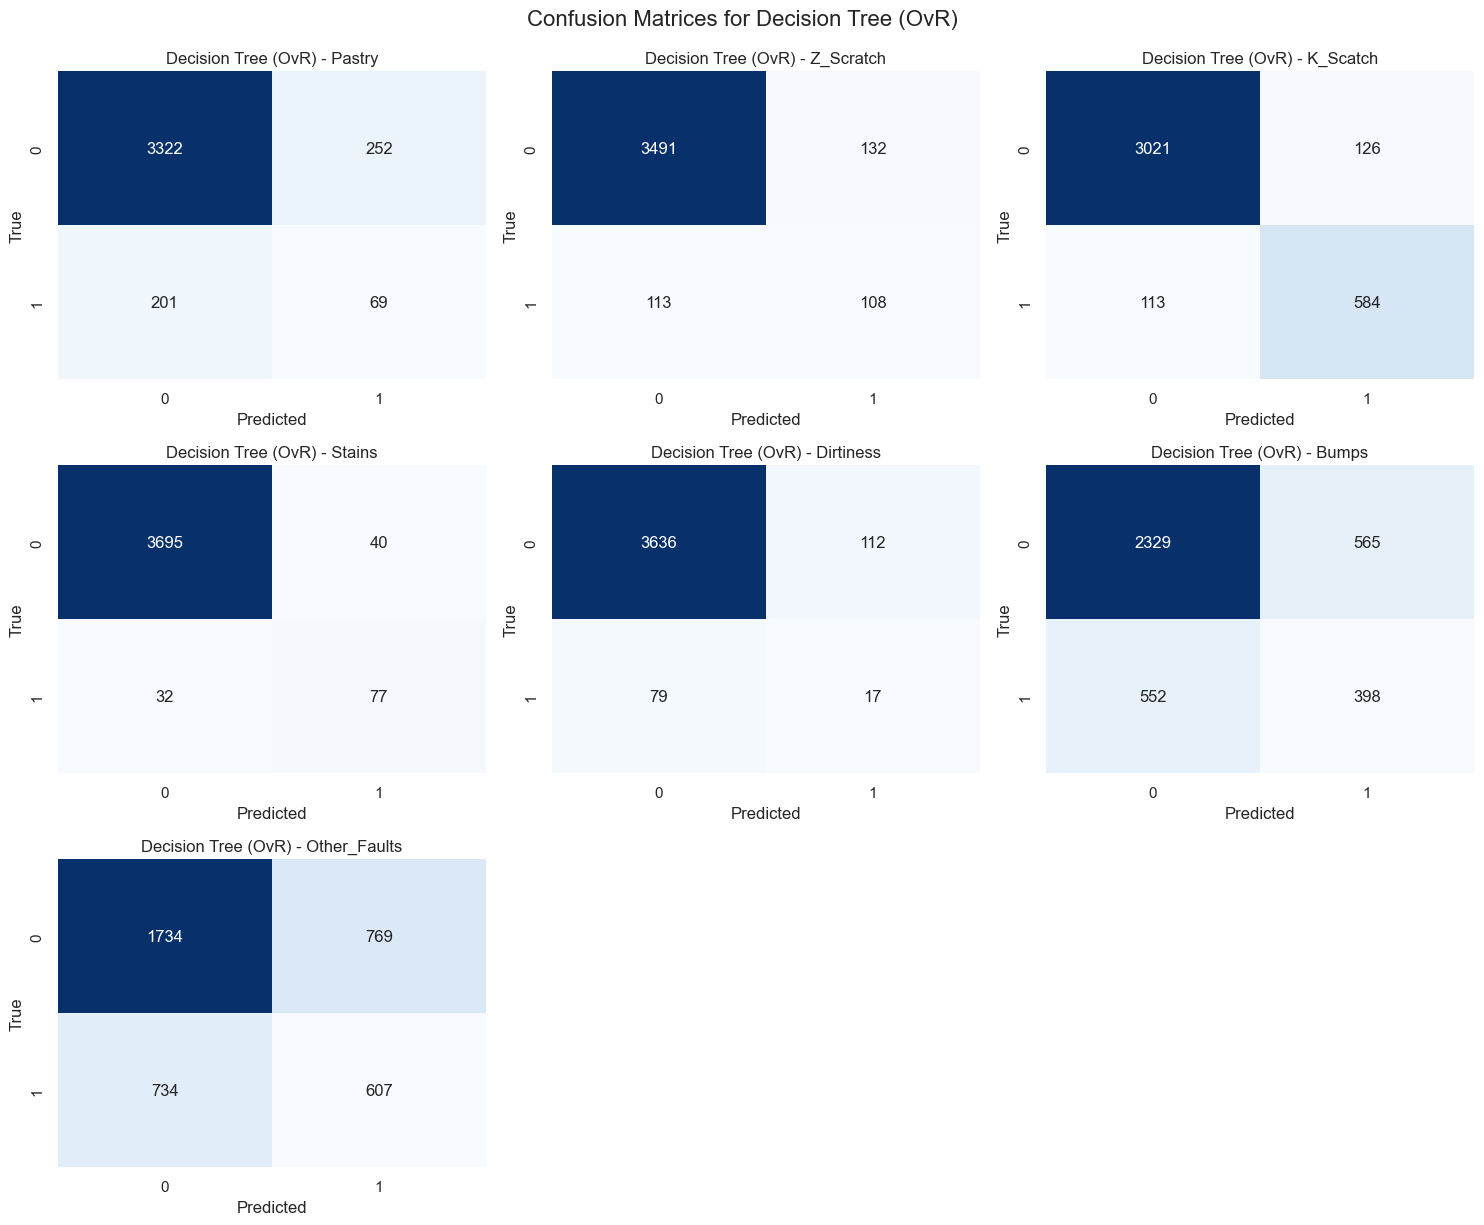


--- Confusion Matrices for k-NN ---
Saved confusion matrices for k-NN to: models_visualizations\k-NN_confusion_matrices.png


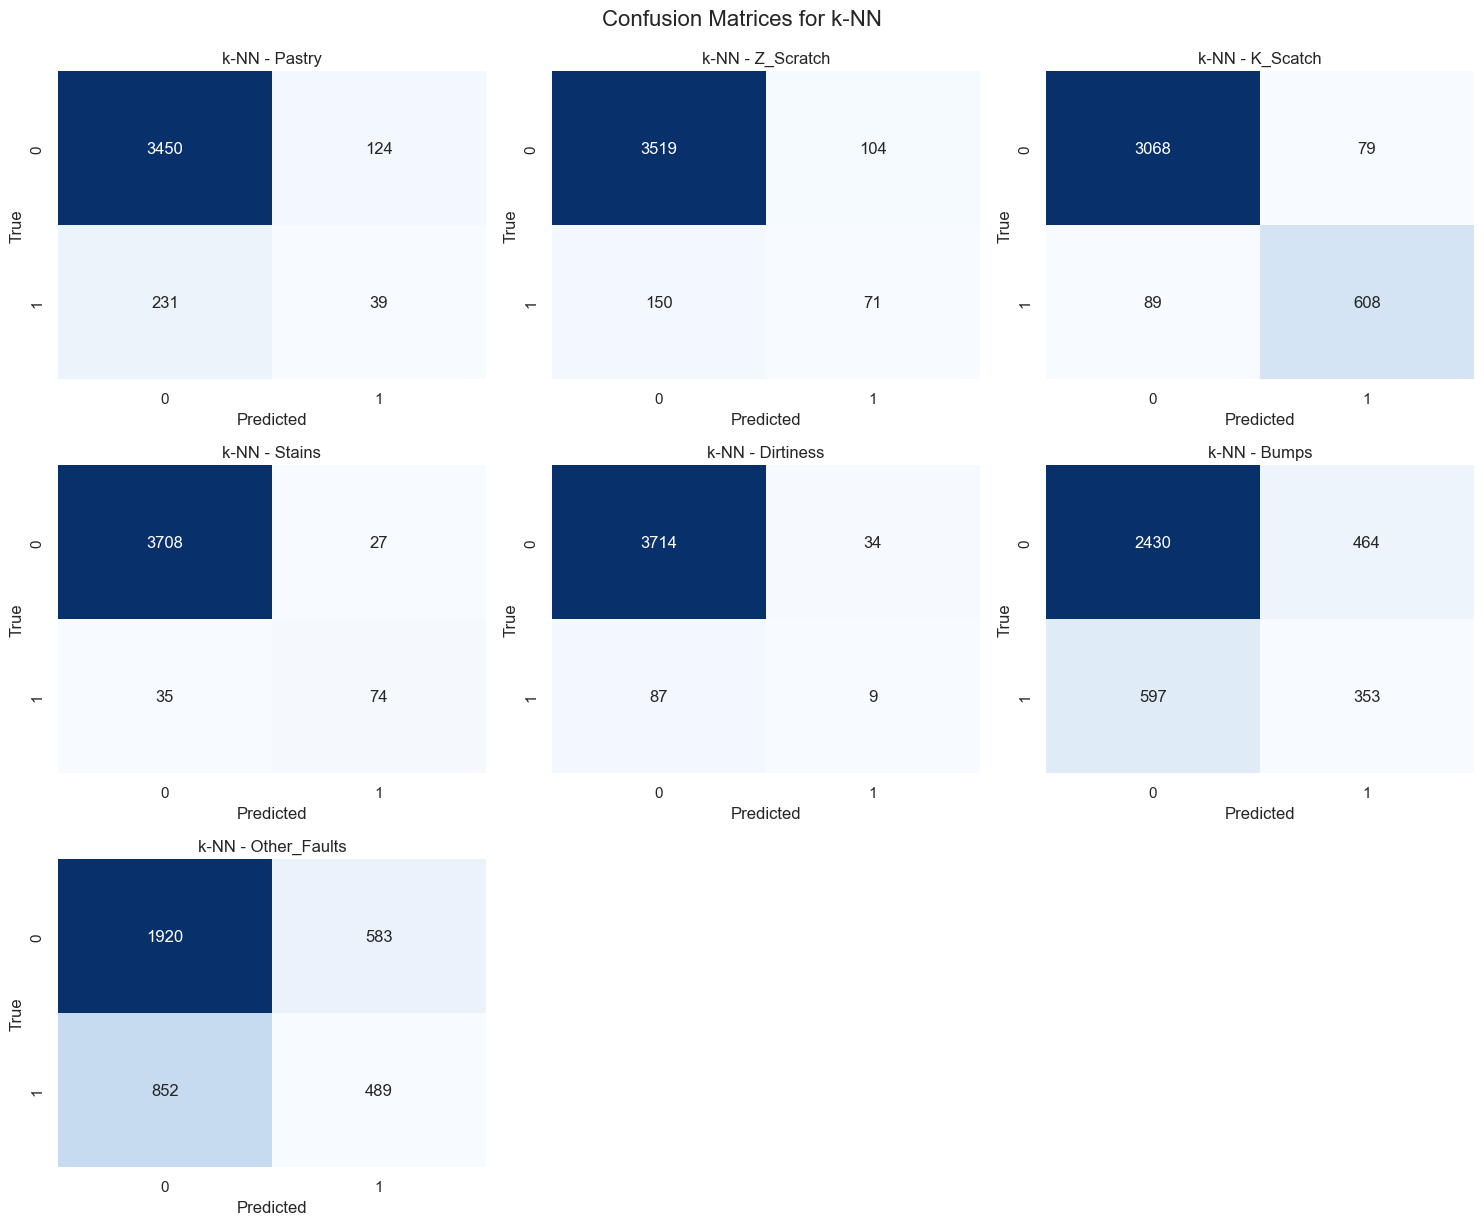


--- Confusion Matrices for MLP Classifier ---
Saved confusion matrices for MLP Classifier to: models_visualizations\MLP_Classifier_confusion_matrices.png


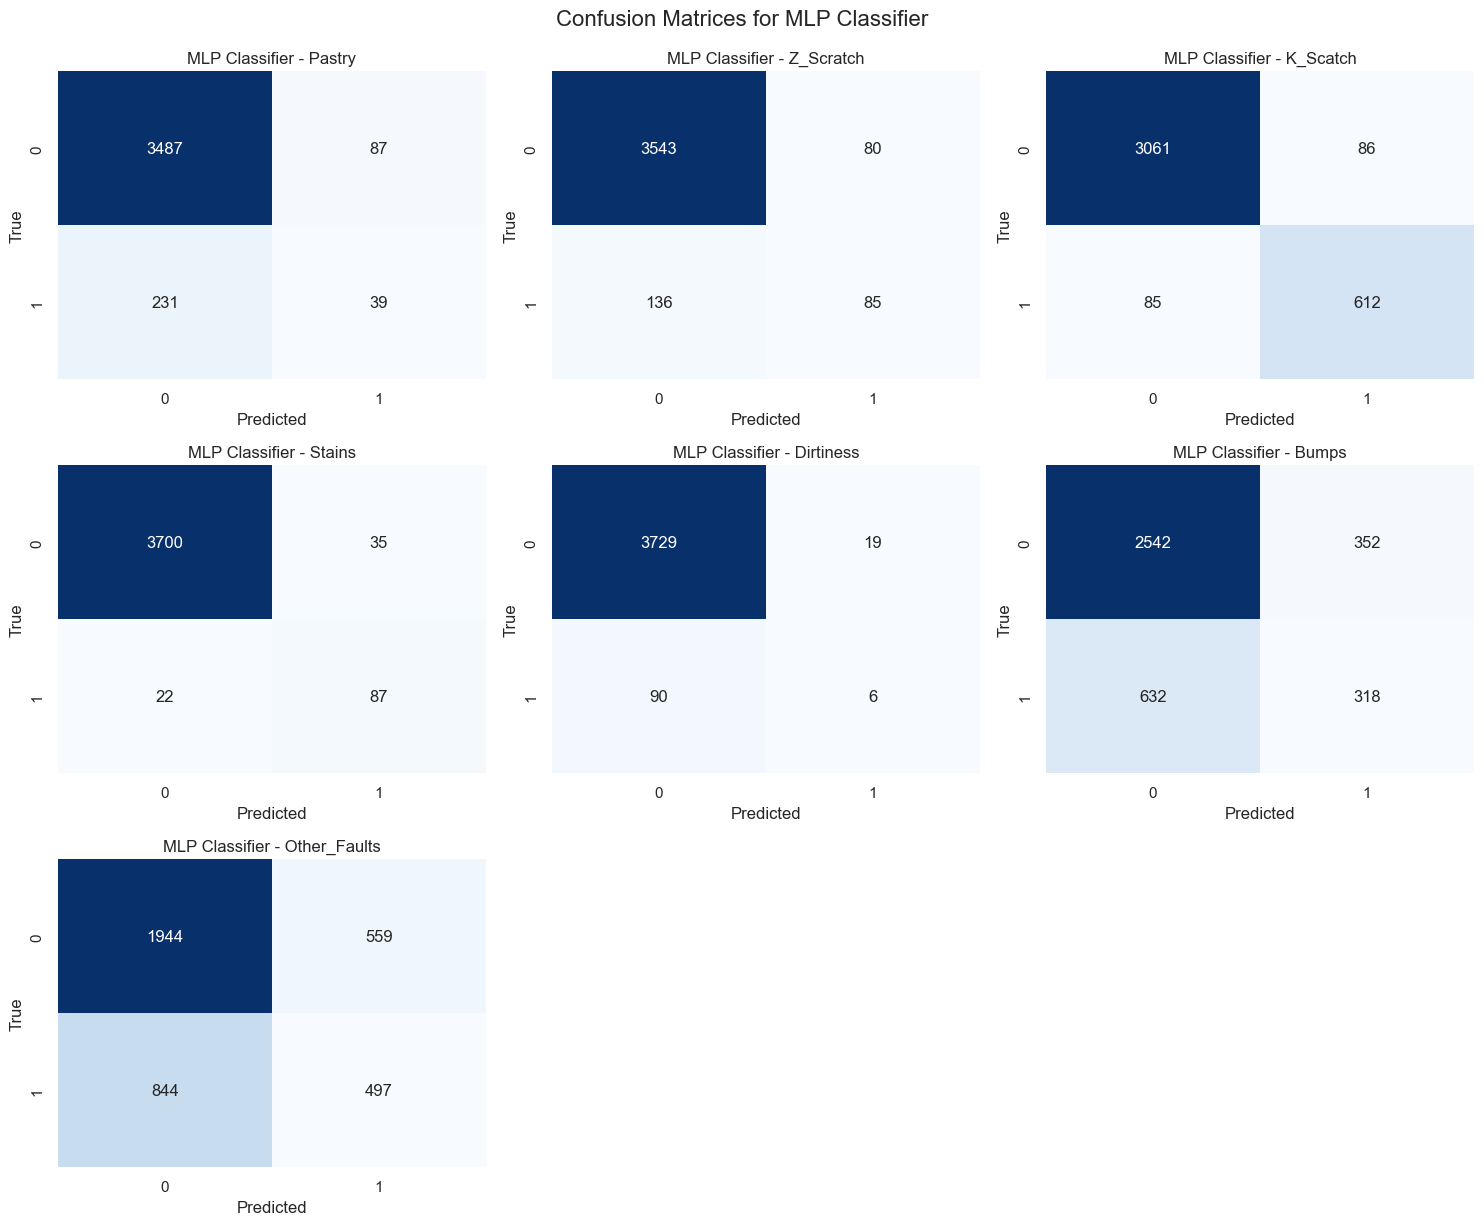

In [48]:
def plot_multilabel_confusion_matrices(y_true, y_pred, model_name, labels):
    """Plots confusion matrices for each label in a multi-label setting."""
    cm = multilabel_confusion_matrix(y_true, y_pred)
    
    n_labels = len(labels)
    n_cols = 3
    n_rows = (n_labels + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
    axes = axes.flatten()
    
    for i, label_cm in enumerate(cm):
        if i < len(labels): # Ensure we don't go out of bounds if labels list is shorter
            sns.heatmap(label_cm, annot=True, fmt='d', cmap='Blues', ax=axes[i], cbar=False)
            axes[i].set_title(f'{model_name} - {labels[i]}')
            axes[i].set_xlabel('Predicted')
            axes[i].set_ylabel('True')
            # TN, FP, FN, TP
    
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
        
    plt.tight_layout()
    plt.suptitle(f'Confusion Matrices for {model_name}', fontsize=16, y=1.02)
    if models_visualizations:
        try:
            cm_filename = os.path.join(models_visualizations, f'{model_name.replace(" ", "_")}_confusion_matrices.png')
            plt.savefig(cm_filename, bbox_inches='tight')
            print(f"Saved confusion matrices for {model_name} to: {cm_filename}")
        except Exception as e:
            print(f"Could not save confusion matrices for {model_name}: {e}")
    plt.show()

for model_name, results in model_performance.items():
    if results['Predictions'] is not None:
        print(f"\n--- Confusion Matrices for {model_name} ---")
        plot_multilabel_confusion_matrices(y_val_processed, results['Predictions'], model_name, target_columns)

# TODO: specific analysis

**Figures: Confusion Matrices (Per Label, Per Model)**

The heatmaps above display the confusion matrix for each defect type (label) for each trained model. For each matrix:
- **Top-left (TN):** True Negatives (correctly predicted as not the defect).
- **Top-right (FP):** False Positives (incorrectly predicted as the defect - Type I error).
- **Bottom-left (FN):** False Negatives (incorrectly predicted as not the defect - Type II error).
- **Bottom-right (TP):** True Positives (correctly predicted as the defect).

Analyzing these helps understand which defects are harder to predict and what kind of errors each model tends to make for each specific defect.
*(Manually insert your specific analysis here based on the generated matrices.)*

### 7.2 ROC Curves and AUC (Per Label)

Receiver Operating Characteristic (ROC) curves and the Area Under the Curve (AUC) are useful for evaluating the performance of binary classifiers at various threshold settings. For multi-label problems, we can plot ROC curves for each label. This requires models to output probability scores.


--- ROC Curves for Decision Tree (OvR) ---
Saved ROC curves for Decision Tree (OvR) to: models_visualizations\Decision_Tree_(OvR)_roc_curves.png


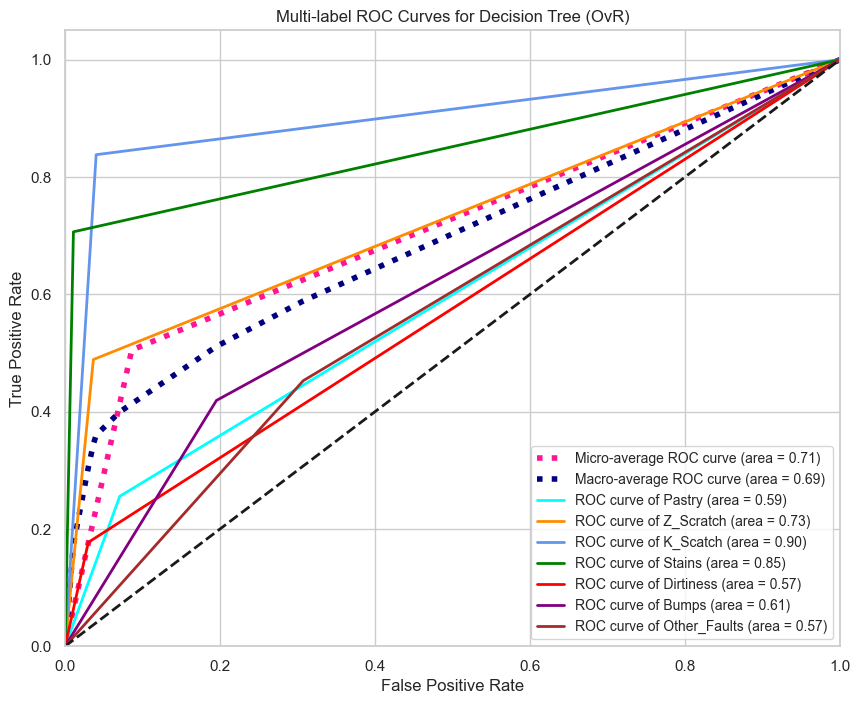

Macro-average ROC AUC for Decision Tree (OvR): 0.6891
Micro-average ROC AUC for Decision Tree (OvR): 0.7095

--- ROC Curves for k-NN ---
Saved ROC curves for k-NN to: models_visualizations\k-NN_roc_curves.png


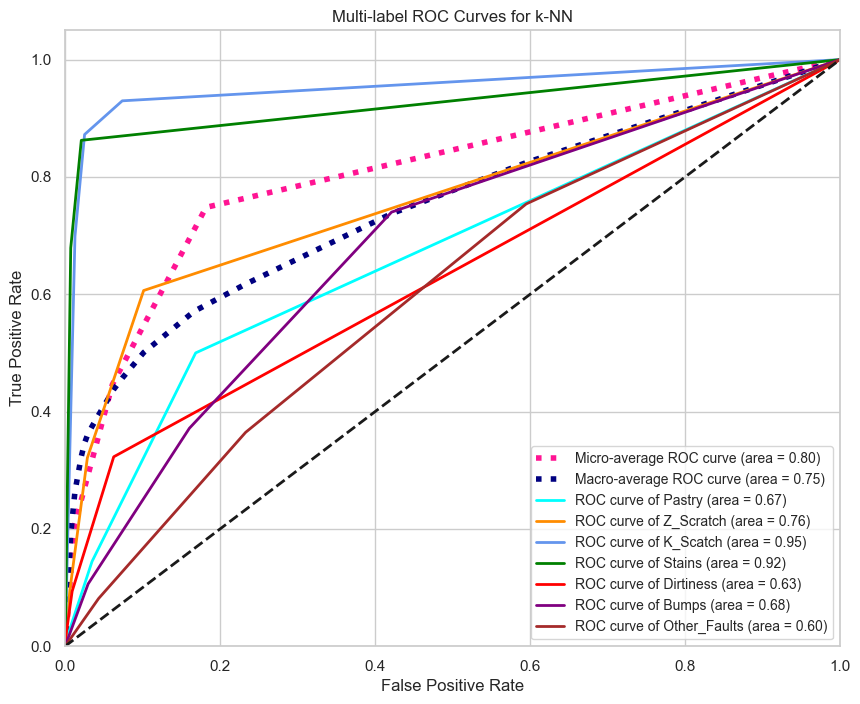

Macro-average ROC AUC for k-NN: 0.7459
Micro-average ROC AUC for k-NN: 0.8045

--- ROC Curves for MLP Classifier ---
Saved ROC curves for MLP Classifier to: models_visualizations\MLP_Classifier_roc_curves.png


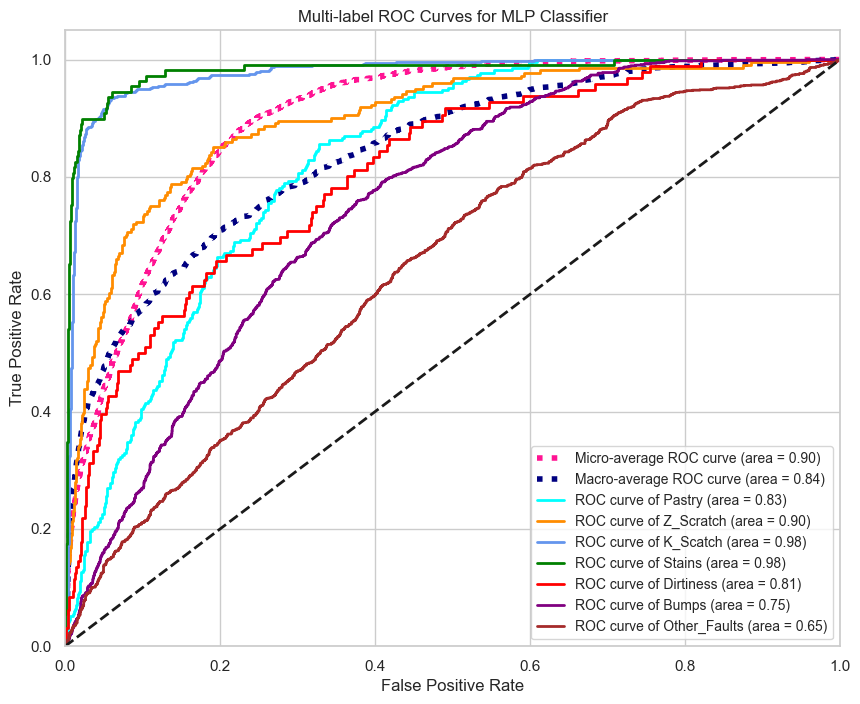

Macro-average ROC AUC for MLP Classifier: 0.8407
Micro-average ROC AUC for MLP Classifier: 0.8977


In [50]:
from itertools import cycle

def plot_multilabel_roc_curves(y_true_df, y_prob_matrix, model_name, labels):
    """Plots ROC curves for each label and calculates macro/micro average AUC."""
    if y_prob_matrix is None:
        print(f"No probability scores available for {model_name}. Skipping ROC curves.")
        return

    # Handle different probability output structures
    n_labels = len(labels)
    # If y_prob_matrix is a list (e.g., from KNN), convert to (n_samples, n_labels) of positive class probs
    if isinstance(y_prob_matrix, list) and len(y_prob_matrix) == n_labels:
        # Each element: (n_samples, 2), take prob of class 1
        y_prob_matrix = np.column_stack([prob[:, 1] for prob in y_prob_matrix])
    else:
        y_prob_matrix = np.array(y_prob_matrix)
        # KNN (sometimes) returns (n_samples, 2*n_labels)
        if y_prob_matrix.shape[1] == 2 * n_labels:
            print(f"Detected binary probabilities format (shape: {y_prob_matrix.shape})")
            y_prob_matrix = y_prob_matrix[:, 1::2]
            print(f"Extracted positive class probabilities with shape: {y_prob_matrix.shape}")

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    y_true_np = y_true_df.values # Convert y_true to numpy array for sklearn metrics

    for i in range(n_labels):
        fpr[i], tpr[i], _ = roc_curve(y_true_np[:, i], y_prob_matrix[:, i])
        roc_auc[i] = roc_auc_score(y_true_np[:, i], y_prob_matrix[:, i])

    # Micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_np.ravel(), y_prob_matrix.ravel())
    roc_auc["micro"] = roc_auc_score(y_true_np, y_prob_matrix, average="micro")

    # Macro-average ROC curve and ROC area
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_labels)]))
    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_labels):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    # Finally average it and compute AUC
    mean_tpr /= n_labels
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = roc_auc_score(y_true_np, y_prob_matrix, average="macro")

    plt.figure(figsize=(10, 8))
    
    plt.plot(fpr["micro"], tpr["micro"],
             label=f'Micro-average ROC curve (area = {roc_auc["micro"]:.2f})',
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label=f'Macro-average ROC curve (area = {roc_auc["macro"]:.2f})',
             color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown'])
    for i, color in zip(range(n_labels), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve of {labels[i]} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Multi-label ROC Curves for {model_name}')
    plt.legend(loc="lower right", fontsize='small')
    plt.grid(True)
    
    if models_visualizations:
        try:
            roc_filename = os.path.join(models_visualizations, f'{model_name.replace(" ", "_")}_roc_curves.png')
            plt.savefig(roc_filename, bbox_inches='tight')
            print(f"Saved ROC curves for {model_name} to: {roc_filename}")
        except Exception as e:
            print(f"Could not save ROC curves for {model_name}: {e}")
    plt.show()
    
    print(f"Macro-average ROC AUC for {model_name}: {roc_auc['macro']:.4f}")
    print(f"Micro-average ROC AUC for {model_name}: {roc_auc['micro']:.4f}")


for model_name, results in model_performance.items():
    if results['Probabilities'] is not None:
        print(f"\n--- ROC Curves for {model_name} ---")
        plot_multilabel_roc_curves(y_val_processed, results['Probabilities'], model_name, target_columns)
    else:
        print(f"\nSkipping ROC Curves for {model_name} as probability scores are not available.")

# TODO: specific analysis

**Figures: ROC Curves (Per Label and Averaged, Per Model)**

The ROC curves plot the True Positive Rate (Recall) against the False Positive Rate at various threshold settings.
- The **Area Under the Curve (AUC)** is a scalar value representing the overall performance. An AUC of 1 indicates a perfect classifier, while an AUC of 0.5 suggests a random classifier.
- **Micro-average ROC/AUC:** Aggregates the contributions of all classes to compute the average metric. It gives more weight to common classes.
- **Macro-average ROC/AUC:** Computes the metric independently for each class and then takes the average, treating all classes equally, regardless of imbalance.
- Individual curves for each defect type help assess model performance for specific defects.

*(Manually insert your specific analysis here based on the generated ROC curves and AUC values. Compare how well each model distinguishes between positive and negative instances for each defect type.)*

# TODO: improve and rethink implementation (use?)

### 7.3 Learning Curves

Learning curves show the validation and training score of an estimator for varying numbers of training samples. It helps to judge how much a model benefits from adding more training data and whether the estimator suffers more from a variance error or a bias error.


--- Learning Curves for Decision Tree (Best Params - Example for 'Pastry') ---
Saved learning curves for Decision Tree (Best Params) to: models_visualizations\Decision_Tree_Best_Params_learning_curves.png


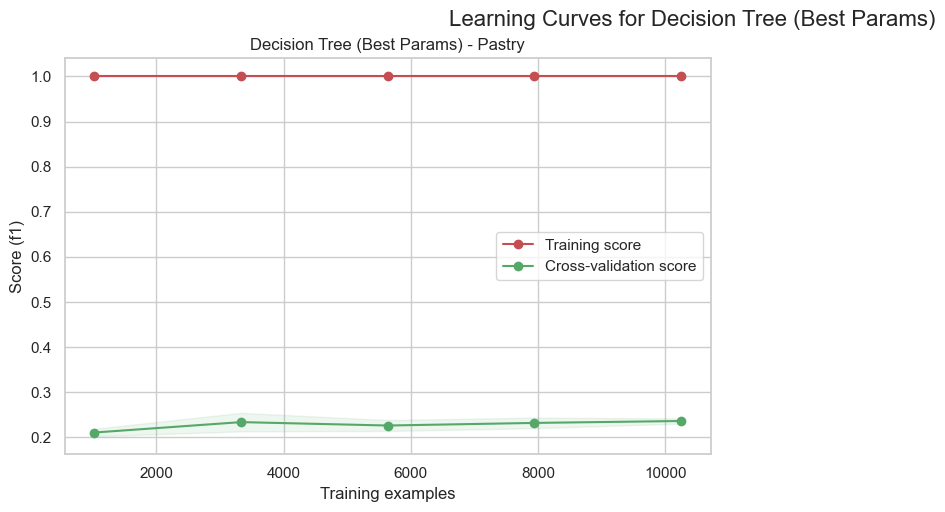


--- Learning Curves for k-NN (Best Params - Example for 'Bumps') ---
Saved learning curves for k-NN (Best Params) to: models_visualizations\k-NN_Best_Params_learning_curves.png


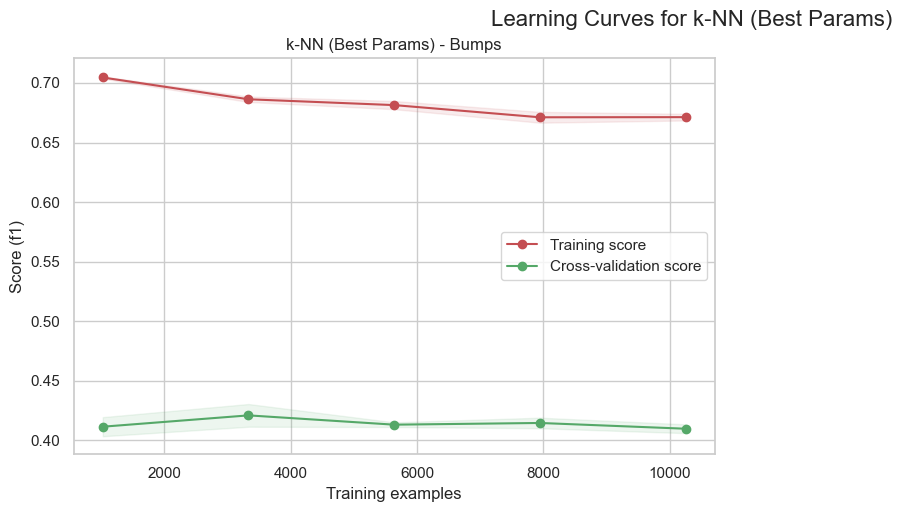

In [51]:
from sklearn.model_selection import learning_curve

def plot_learning_curves_multilabel(estimator, title, X, y_df, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), scoring='f1_samples', labels=None):
    """
    Generate a simple plot of the test and training learning curve for each label.
    """
    if labels is None:
        labels = y_df.columns.tolist()
    
    n_labels = y_df.shape[1]
    n_cols = 2
    n_rows = (n_labels + n_cols - 1) // n_cols

    plt.figure(figsize=(n_cols * 7, n_rows * 5))
    
    y_np = y_df.values

    for i, label_name in enumerate(labels):
        ax = plt.subplot(n_rows, n_cols, i + 1)
        ax.set_title(f"{title} - {label_name}")
        ax.set_xlabel("Training examples")
        ax.set_ylabel(f"Score ({scoring})")
        
        train_sizes_abs, train_scores, test_scores = learning_curve(
            estimator, X, y_np[:, i], cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=scoring)
        
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        
        ax.grid(True)
        ax.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
        ax.fill_between(train_sizes_abs, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")
        ax.plot(train_sizes_abs, train_scores_mean, 'o-', color="r",
                 label="Training score")
        ax.plot(train_sizes_abs, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
        ax.legend(loc="best")

    plt.tight_layout()
    plt.suptitle(f'Learning Curves for {title}', fontsize=16, y=1.02)
    if models_visualizations:
        try:
            lc_filename = os.path.join(models_visualizations, f'{title.replace(" ", "_").replace("(","").replace(")","")}_learning_curves.png')
            plt.savefig(lc_filename, bbox_inches='tight')
            print(f"Saved learning curves for {title} to: {lc_filename}")
        except Exception as e:
            print(f"Could not save learning curves for {title}: {e}")
    plt.show()
    return plt

# We'll plot learning curves for the best estimators found by GridSearchCV
# This can be time-consuming, so you might choose to do it only for one or two models, or a single label.
# For demonstration, let's try for the Decision Tree (if it finished) for a couple of labels.
# Note: learning_curve expects a single estimator, not OneVsRestClassifier directly for this per-label plotting.
# We need to extract the base estimator for a specific label or use a different strategy.

# For simplicity, let's use the best estimators that GridSearchCV already trained.
# If the estimator is OneVsRest, we'd ideally plot for each internal estimator.
# The function above is designed to take a single estimator and a single target column (y_np[:, i]).

# Example for Decision Tree (best parameters from GridSearchCV, trained as OneVsRest)
# We will take the best parameters and retrain a single Decision Tree for one specific label to demonstrate.
# This is a simplified approach. For OneVsRest, you would analyze each sub-classifier.
if 'Decision Tree (OvR)' in model_performance:
    print("\n--- Learning Curves for Decision Tree (Best Params - Example for 'Pastry') ---")
    # Extract best params for the estimator part
    best_dt_params_full = model_performance['Decision Tree (OvR)']['Best Params']
    best_dt_params_estimator = {k.replace('estimator__', ''): v for k, v in best_dt_params_full.items()}
    
    # Create a new DT with these best params
    dt_for_lc = DecisionTreeClassifier(**best_dt_params_estimator, random_state=42)
    
    # Find index of 'Pastry'
    if 'Pastry' in target_columns:
        pastry_idx = target_columns.index('Pastry')
        plot_learning_curves_multilabel(dt_for_lc, "Decision Tree (Best Params)", 
                                        X_train_processed, y_train_processed[['Pastry']], # Pass as DataFrame for column name
                                        cv=3, n_jobs=-1, scoring='f1', labels=['Pastry'])
    else:
        print("Label 'Pastry' not found in target columns.")
else:
    print("Decision Tree model not found in performance results, skipping its learning curve.")

if 'k-NN' in model_performance:
    print("\n--- Learning Curves for k-NN (Best Params - Example for 'Bumps') ---")
    best_knn_params_full = model_performance['k-NN']['Best Params']
    knn_for_lc = KNeighborsClassifier(**best_knn_params_full, n_jobs=-1)
    if 'Bumps' in target_columns:
        bumps_idx = target_columns.index('Bumps')
        plot_learning_curves_multilabel(knn_for_lc, "k-NN (Best Params)",
                                        X_train_processed, y_train_processed[['Bumps']],
                                        cv=3, n_jobs=-1, scoring='f1', labels=['Bumps'])
    else:
        print("Label 'Bumps' not found in target columns.")
else:
    print("k-NN model not found in performance results, skipping its learning curve.")

# TODO: specific analysis

**Figures: Learning Curves (Example for selected models/labels)**

Learning curves are plotted for a chosen model and a specific label (e.g., 'Pastry' for Decision Tree).
- **Training Score (Red Line):** The model's F1-score on the training data used to plot the curve.
- **Cross-Validation Score (Green Line):** The model's F1-score on an independent validation set (internal to the `learning_curve` function via CV) as the number of training samples increases.
- **Interpretation:**
    - If both scores converge to a low value, the model might be suffering from **high bias** (underfitting). More data might not help much; a more complex model or better features might be needed.
    - If there's a large gap between a high training score and a lower validation score, the model might have **high variance** (overfitting). More data could help, or techniques like regularization, feature selection, or a simpler model.
    - If the validation score increases with more data and converges towards the training score, the model is learning well, and more data is beneficial.

*(Manually insert your specific analysis here based on the generated learning curves for the models and labels you choose to plot.)*

# TODO

## 8. Conclusion and Further Analysis Summary

*(This is where you would summarize your findings from the entire EDA, preprocessing, modeling, and evaluation process. Discuss which models performed best overall, which features seemed most important (if feature importance was analyzed), challenges faced (e.g., multi-label complexity, class imbalance), and potential next steps or improvements.)*

# TODO: perceber onde modelos falham e porque, etc!!!